<h1 style="text-align: center;"><strong>Predicting Employee Performance</strong></h1>


<h2 style="text-align: center;"><strong>Busisness Case</strong></h2>


### Background:
> INX Future Inc. is a leading global provider of data analytics and automation solutions, with over 15 years of industry presence. The company is well-regarded for its employee-centric policies and has consistently ranked among the top 20 best employers for the past five years. Its work culture is widely appreciated, making it a preferred choice for top talent across the industry. However, in recent years, the organization has observed a decline in employee performance, which is beginning to impact service quality and client satisfaction. Given its strong employer branding and reputation, INX is committed to resolving these performance issues through a thoughtful, data-driven approach that supports employee growth while maintaining organizational excellence.

### Problem Statement:
> INX Future Inc. is currently experiencing a noticeable decline in employee performance, which has led to an 8% drop in client satisfaction and a rise in service delivery escalations. While these issues are concerning, the management—especially the CEO, Mr. Brain—is hesitant to take direct action against underperforming employees due to fears of negatively affecting overall morale and the company's strong reputation as a top employer. There is a lack of clarity on the root causes of the performance decline, making it difficult to implement effective solutions. To address this challenge, a data-driven analysis is needed to identify department-wise performance trends, key factors impacting productivity, and to develop a predictive model for evaluating future employee performance. The goal is to enable strategic interventions that improve performance without compromising employee motivation or the organization's positive work environment.



<h1 style="text-align: center;"><strong>Domain Analysis</strong></h1>


> This domain analysis focuses on understanding employee performance through the lens of HR Analytics. The dataset contains 1,200 employee records across 28 features including age, education, department, experience, and training hours. By applying machine learning techniques, the goal is to identify patterns and predictors of low or high performance. These insights can help organizations like INX Future Inc. make data-driven decisions for hiring, training, and performance management, while maintaining a healthy and motivated workforce. 

In [6]:
# Importing necessary libraries
import pandas as pd             # For data manipulation and analysis
import numpy as np              # For numerical operations
import matplotlib.pyplot as plt # For data visualization
import seaborn as sns           # For advanced data visualization
import warnings                 # To suppress warning messages

# Ignore warning messages for clean output
warnings.filterwarnings("ignore")


In [7]:
pd.set_option("display.max_columns",None) # show all columns name

In [8]:
# load the dataset
data = pd.read_excel("INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls")
data

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

## Dataset Understanding  
> The dataset includes various features that are workplace and employee-related indicators of performance. Understanding the significance of each feature is crucial for building a reliable model to assess employee performance and suggest strategic interventions.


### Dataset Overview  
- **Total Records**: 1200  
- **Target Variable**: PerformanceRating  
- **Class Labels**:  
  - Rating 2 – Below Average  
  - Rating 3 – Average  
  - Rating 4 – High Performer  
- **Total Attributes**: 28 (including the target variable)

---

### Key Features in the Dataset

| Column Name                        | Description                                                                 | Significance                                                                                     |
|------------------------------------|-----------------------------------------------------------------------------|--------------------------------------------------------------------------------------------------|
| **EmpNumber**                      | Unique ID for each employee.                                               | Used to identify and track individual employee data.                                             |
| **Age**                            | Age of the employee.                                                       | Age can impact experience, adaptability, and career phase.                                       |
| **Gender**                         | Gender of the employee (Male/Female).                                      | Can help analyze diversity and gender-based performance trends.                                  |
| **EducationBackground**            | Educational field (e.g., Science, Commerce).                               | Different backgrounds may influence role fit and learning ability.                               |
| **MaritalStatus**                  | Marital status (e.g., Single, Married).                                    | May affect work-life balance and job satisfaction.                                               |
| **EmpDepartment**                  | Employee’s department.                                                     | Department-level analysis helps identify localized issues or strengths.                          |
| **EmpJobRole**                     | Specific job role/title.                                                   | Roles may have differing KPIs and responsibilities affecting performance.                        |
| **BusinessTravelFrequency**        | Frequency of business trips.                                               | Travel can influence fatigue, work-life balance, and satisfaction.                               |
| **DistanceFromHome**               | Distance (in kms) between home and office.                                 | Long commutes may affect energy, punctuality, and stress levels.                                 |
| **EmpEducationLevel**              | Education level (scale 1–5).                                               | May impact analytical thinking, job readiness, and expectations.                                 |
| **EmpEnvironmentSatisfaction**     | Satisfaction with the work environment (scale 1–4).                        | A healthy environment fosters better performance and retention.                                  |
| **EmpHourlyRate**                  | Hourly wage.                                                               | May reflect experience or job level; can influence motivation.                                   |
| **EmpJobInvolvement**              | Job involvement level (scale 1–4).                                         | Highly involved employees are typically more productive.                                         |
| **EmpJobLevel**                    | Organizational job level.                                                  | Indicates position in the hierarchy and associated responsibilities.                             |
| **EmpJobSatisfaction**             | Satisfaction with the job (scale 1–4).                                     | Job satisfaction is directly linked to performance and loyalty.                                  |
| **NumCompaniesWorked**             | Number of previous employers.                                              | High count may reflect instability or a wide range of experience.                                |
| **OverTime**                       | Whether the employee works overtime (Yes/No).                              | Can indicate dedication or burnout; needs context.                                               |
| **EmpLastSalaryHikePercent**       | Last salary increase percentage.                                           | Affects morale and reflects recent recognition or dissatisfaction.                               |
| **EmpRelationshipSatisfaction**    | Satisfaction with workplace relationships (scale 1–4).                     | Team dynamics affect productivity, especially in collaborative roles.                            |
| **TotalWorkExperienceInYears**     | Overall professional experience.                                           | Experienced employees may have developed skills for higher performance.                          |
| **TrainingTimesLastYear**          | Number of training sessions attended.                                      | Regular training improves skillset and adaptability.                                              |
| **EmpWorkLifeBalance**             | Work-life balance score (scale 1–4).                                       | Imbalance may lead to stress and lower efficiency.                                                |
| **ExperienceYearsAtThisCompany**   | Tenure at the company.                                                     | Longer tenure may indicate loyalty and deeper company knowledge.                                 |
| **ExperienceYearsInCurrentRole**   | Time spent in the current role.                                            | Prolonged time in the same role can lead to mastery or stagnation.                               |
| **YearsSinceLastPromotion**        | Years since the last promotion.                                            | Lack of career growth may affect motivation and engagement.                                      |
| **YearsWithCurrManager**           | Time spent under the current manager.                                      | Positive manager-employee relationships enhance communication and trust.                         |
| **Attrition**                      | Indicates whether the employee has left the company (Yes/No).              | Important to understand if performance is tied to retention risk.                                |
| **PerformanceRating**              | Overall performance rating of the employee.                                | This is the target variable used to classify employee performance.                               |

---

<h2 style="text-align: center;"><strong>Basic Check</strong></h2>

#### Definition:
> A basic check is a preliminary assessment to ensure that a system, process, or dataset meets essential criteria. In data analysis, this includes verifying the structure of a dataset, such as checking for missing values, confirming data types, and ensuring the expected number of records. Basic checks help identify issues early and maintain quality before further analysis.


In [14]:
data.head() # Display the first 5 rows of the DataFrame

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

In [16]:
data.tail() # Display the last 5 rows of the DataFrame

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   9   

     OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
1195      Yes                        20                            2   
1196       No                        17                            1   
1197      Yes                        11                            3   
1198       No                        14                            2   
1199       No                        14                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

      YearsSinceLastPromotion  YearsWithCurrManager Attrition  \
1195                        0                     4        No   
1196                        0                     0        No   
1197                        3                     8        No   
1198                        7                     7        No   
1199                        2                     0       Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2

In [18]:
data.shape # Get the shape of the dataset (number of rows and columns)

(1200, 28)

In [20]:
# Get a summary of statistical information about the dataset (mean, std, min, max, etc.)
data.describe()

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000


The `.describe()` method provides an overview of the statistical properties of numeric columns in the dataset, including:
- **Count**: Number of non-null observations.
- **Mean**: Average value of each feature.
- **Standard Deviation (std)**: Measures spread or variability.
- **Min/Max**: Minimum and maximum observed values.
- **25th, 50th (median), and 75th Percentiles**: Indicators of data distribution#.

### Analysis:
1. **Age** – Employees range from **18 to 60 years**. Most are in their **30s**.  
2. **ExperienceYearsAtThisCompany** – Average tenure is **7+ years**, suggesting a **stable workforce**.  
3. **EmpEducationLevel** – Ranges from **1 to 5**, indicating a **diverse educational background**.  
4. **PerformanceRating** – Most common rating is **3 (Average)**, showing a **balanced distribution**.  
5. **EmpWorkLifeBalance** – Average score is **2.74**, reflecting a **moderate work-life balance**.  
6. **EmpLastSalaryHikePercent** – Typically between **11% and 18%**, with highs up to **25%**.  
7. **YearsSinceLastPromotion** – Mean value is around **2.2 years**, indicating **limited recent promotions**.  
8. **NumCompaniesWorked** – Employees have worked at an average of **~3 companies**, implying **moderate job movement**.  
9. **TrainingTimesLastYear** – Average is **2.8 trainings per year**, showing **some investment in upskilling**.

> **Conclusion**: While the workforce is experienced and relatively stable, improvements in **promotion cycles**, **training frequency**, and **work-life balance** could further enhance employee satisfaction and performance.


In [23]:
data.describe(include="O") # Get a summary of categorical columns (object type), showing the count of unique values, top (most frequent), and frequency

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top     E1001000   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

#### Categorical Feature Insights

The following insights are derived from the `.describe()` summary for categorical columns:

1. **EmpNumber**: All **1200 values are unique**, confirming this is a **unique employee identifier**.
2. **Gender**: Majority of employees are **Male (725 out of 1200)**, indicating a **gender imbalance** in the workforce.
3. **EducationBackground**: There are **6 distinct education backgrounds**, with **Life Sciences** being the most common (**492 employees**), showing a **preference for science-related education**.
4. **MaritalStatus**: **548 employees are Married**, suggesting that **family responsibilities may influence work-life balance** and attrition patterns.
5. **EmpDepartment**: Employees span **6 departments**, with **Sales being the largest (373 employees)**, indicating a **sales-driven organization**.
6. **EmpJobRole**: With **19 job roles**, **Sales Executive is the most frequent (270 employees)**, reinforcing the **sales-focused nature** of the business.
7. **BusinessTravelFrequency**: Most employees (**846**) travel **rarely**, implying a **stationary workforce** with limited travel fatigue.
8. **OverTime**: **847 employees report No Overtime**, suggesting that **most have regular working hours**, which may positively impact **work-life balance**.
9. **Attrition**: **Only 178 employees have left** (out of 1200), showing a **low attrition rate (~15%)**, reflecting **strong employee retention**.

> **Conclusion**: The company workforce is largely **male, married, and life sciences–educated**, with a strong **sales orientation**, **low travel frequency**, and **limited overtime**. These patterns suggest a **stable organizational environment**, but also highlight opportunities to improve **diversity and career mobility**.
n strategies.
ttrition reduction strategies.


In [26]:
data.describe(include='all').T # Generate descriptive statistics for the DataFrame and transpose the result

count unique              top  freq       mean  \
EmpNumber                       1200   1200         E1001000     1        NaN   
Age                           1200.0    NaN              NaN   NaN  36.918333   
Gender                          1200      2             Male   725        NaN   
EducationBackground             1200      6    Life Sciences   492        NaN   
MaritalStatus                   1200      3          Married   548        NaN   
EmpDepartment                   1200      6            Sales   373        NaN   
EmpJobRole                      1200     19  Sales Executive   270        NaN   
BusinessTravelFrequency         1200      3    Travel_Rarely   846        NaN   
DistanceFromHome              1200.0    NaN              NaN   NaN   9.165833   
EmpEducationLevel             1200.0    NaN              NaN   NaN     2.8925   
EmpEnvironmentSatisfaction    1200.0    NaN              NaN   NaN   2.715833   
EmpHourlyRate                 1200.0    NaN              NaN   NaN  65.981667   
EmpJobInvolvement             1200.0    NaN              NaN   NaN   2.731667   
EmpJobLevel                   1200.0    NaN              NaN   NaN     2.0675   
EmpJobSatisfaction            1200.0    NaN              NaN   NaN     2.7325   
NumCompaniesWorked            1200.0    NaN              NaN   NaN      2.665   
OverTime                        1200      2               No   847        NaN   
EmpLastSalaryHikePercent      1200.0    NaN              NaN   NaN    15.2225   
EmpRelationshipSatisfaction   1200.0    NaN              NaN   NaN      2.725   
TotalWorkExperienceInYears    1200.0    NaN              NaN   NaN      11.33   
TrainingTimesLastYear         1200.0    NaN              NaN   NaN   2.785833   
EmpWorkLifeBalance            1200.0    NaN              NaN   NaN   2.744167   
ExperienceYearsAtThisCompany  1200.0    NaN              NaN   NaN     7.0775   
ExperienceYearsInCurrentRole  1200.0    NaN              NaN   NaN   4.291667   
YearsSinceLastPromotion       1200.0    NaN              NaN   NaN   2.194167   
YearsWithCurrManager          1200.0    NaN              NaN   NaN      4.105   
Attrition                       1200      2               No  1022        NaN   
PerformanceRating             1200.0    NaN              NaN   NaN   2.948333   

                                    std   min   25%   50%   75%    max  
EmpNumber                           NaN   NaN   NaN   NaN   NaN    NaN  
Age                            9.087289  18.0  30.0  36.0  43.0   60.0  
Gender                              NaN   NaN   NaN   NaN   NaN    NaN  
EducationBackground                 NaN   NaN   NaN   NaN   NaN    NaN  
MaritalStatus                       NaN   NaN   NaN   NaN   NaN    NaN  
EmpDepartment                       NaN   NaN   NaN   NaN   NaN    NaN  
EmpJobRole                          NaN   NaN   NaN   NaN   NaN    NaN  
BusinessTravelFrequency             NaN   NaN   NaN   NaN   NaN    NaN  
DistanceFromHome               8.176636   1.0   2.0   7.0  14.0   29.0  
EmpEducationLevel               1.04412   1.0   2.0   3.0   4.0    5.0  
EmpEnvironmentSatisfaction     1.090599   1.0   2.0   3.0   4.0    4.0  
EmpHourlyRate                 20.211302  30.0  48.0  66.0  83.0  100.0  
EmpJobInvolvement              0.707164   1.0   2.0   3.0   3.0    4.0  
EmpJobLevel                    1.107836   1.0   1.0   2.0   3.0    5.0  
EmpJobSatisfaction             1.100888   1.0   2.0   3.0   4.0    4.0  
NumCompaniesWorked             2.469384   0.0   1.0   2.0   4.0    9.0  
OverTime                            NaN   NaN   NaN   NaN   NaN    NaN  
EmpLastSalaryHikePercent       3.625918  11.0  12.0  14.0  18.0   25.0  
EmpRelationshipSatisfaction    1.075642   1.0   2.0   3.0   4.0    4.0  
TotalWorkExperienceInYears     7.797228   0.0   6.0  10.0  15.0   40.0  
TrainingTimesLastYear          1.263446   0.0   2.0   3.0   3.0    6.0  
EmpWorkLifeBalance             0.699374   1.0   2.0   3.0   3.0    4.0  
Ex

In [28]:
data.info() # Get a concise summary of the dataset, showing the number of non-null values and the data types for each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### Insights:
- There are a total of **1200 rows** and **28 columns** in the dataset.
- The dataset has **19 numerical (int64) columns**.
- The dataset has **9 categorical (object) columns**.
- There are **no missing values** in any column.
- **EmpNumber** is a **unique identifier** for each employee.
- The **target variable** is **PerformanceRating**.
- **Attrition** is a **categorical feature** indicating employee turnover.
- The dataset uses about **262.6 KB of memory**.
6+ kb.

<h1 style="text-align: center;"><strong>Exploratory Data Analysis</strong></h1>


> Exploratory Data Analysis (EDA) is a crucial step in the data science process, especially for a project like liver disease prediction. EDA helps you understand the underlying patterns, detect anomalies, and gain insights into the data before applying machine learning algorithms.

#### Distributed in three parts:
* **Univariate Analysis**:- Univariate analysis is essential for gaining insights of individual variables, which can help in further analysis and decision-making.
* **Bivariate Analysis**:- Bivariate analysis is for understanding how two variables influence each other, which can help decision-making and in further analysis.
* **Multivariate Analysis**:- Multivariate analysis is for understanding the relation of multiple factors, to get more insights and also for decision-making in complex datasets.

In [33]:
# Select and store all columns with integer and float data types
# These columns are considered continuous or numerical features
continous_column = data.select_dtypes(include=["int", "float"])

# Display the DataFrame containing only the continuous (numerical) columns
continous_column

Age  DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0      32                10                  3                           4   
1      47                14                  4                           4   
2      40                 5                  4                           4   
3      41                10                  4                           2   
4      60                16                  4                           1   
...   ...               ...                ...                         ...   
1195   27                 3                  1                           4   
1196   37                10                  2                           4   
1197   50                28                  1                           4   
1198   34                 9                  3                           4   
1199   24                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked  EmpLastSalaryHikePercent  \
0                      1                        12   
1                      2                        12   
2                      5                        21   
3                      3                        15   
4                      8                        14   
...                  ...                       ...   
1195                   1                        20   
1196                   3                        17   
1197                   1                        11   
1198                   1                        14   
1199                   9                        14   

      EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                               4                          10   
1                               4                          20   
2                               3                          20   
3                               2                          23   
4                               4                          10   
...                           ...                         ...   
1195                            2                           6   
1196                            1                           4   
1197                            3                          20   
1198                            2                           9   
1199                            1                           4   

      TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                         2                   2                            10   
1                         2                   3                             7   
2                         2                   3                            18   
3                         2                   2                            21   
4                         1                   3                             2   
...                     ...                 ...                           ...   
1195                      3                   3                             6   
1196                      2                   3                             1   
1197     

In [35]:
# Print the names of all continuous (numerical) columns
for column in continous_column:
    print(column)

Age
DistanceFromHome
EmpEducationLevel
EmpEnvironmentSatisfaction
EmpHourlyRate
EmpJobInvolvement
EmpJobLevel
EmpJobSatisfaction
NumCompaniesWorked
EmpLastSalaryHikePercent
EmpRelationshipSatisfaction
TotalWorkExperienceInYears
TrainingTimesLastYear
EmpWorkLifeBalance
ExperienceYearsAtThisCompany
ExperienceYearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager
PerformanceRating


## Univariate Analysis
>  **Definition:**
> 
> Univariate analysis involves examining one variable at a time to understand its distribution, central tendency, and spread. It is commonly performed on numerical and categorical variables.

### 1. Histogram (for numerical data)

Visualize the frequency distribution of numerical columns.

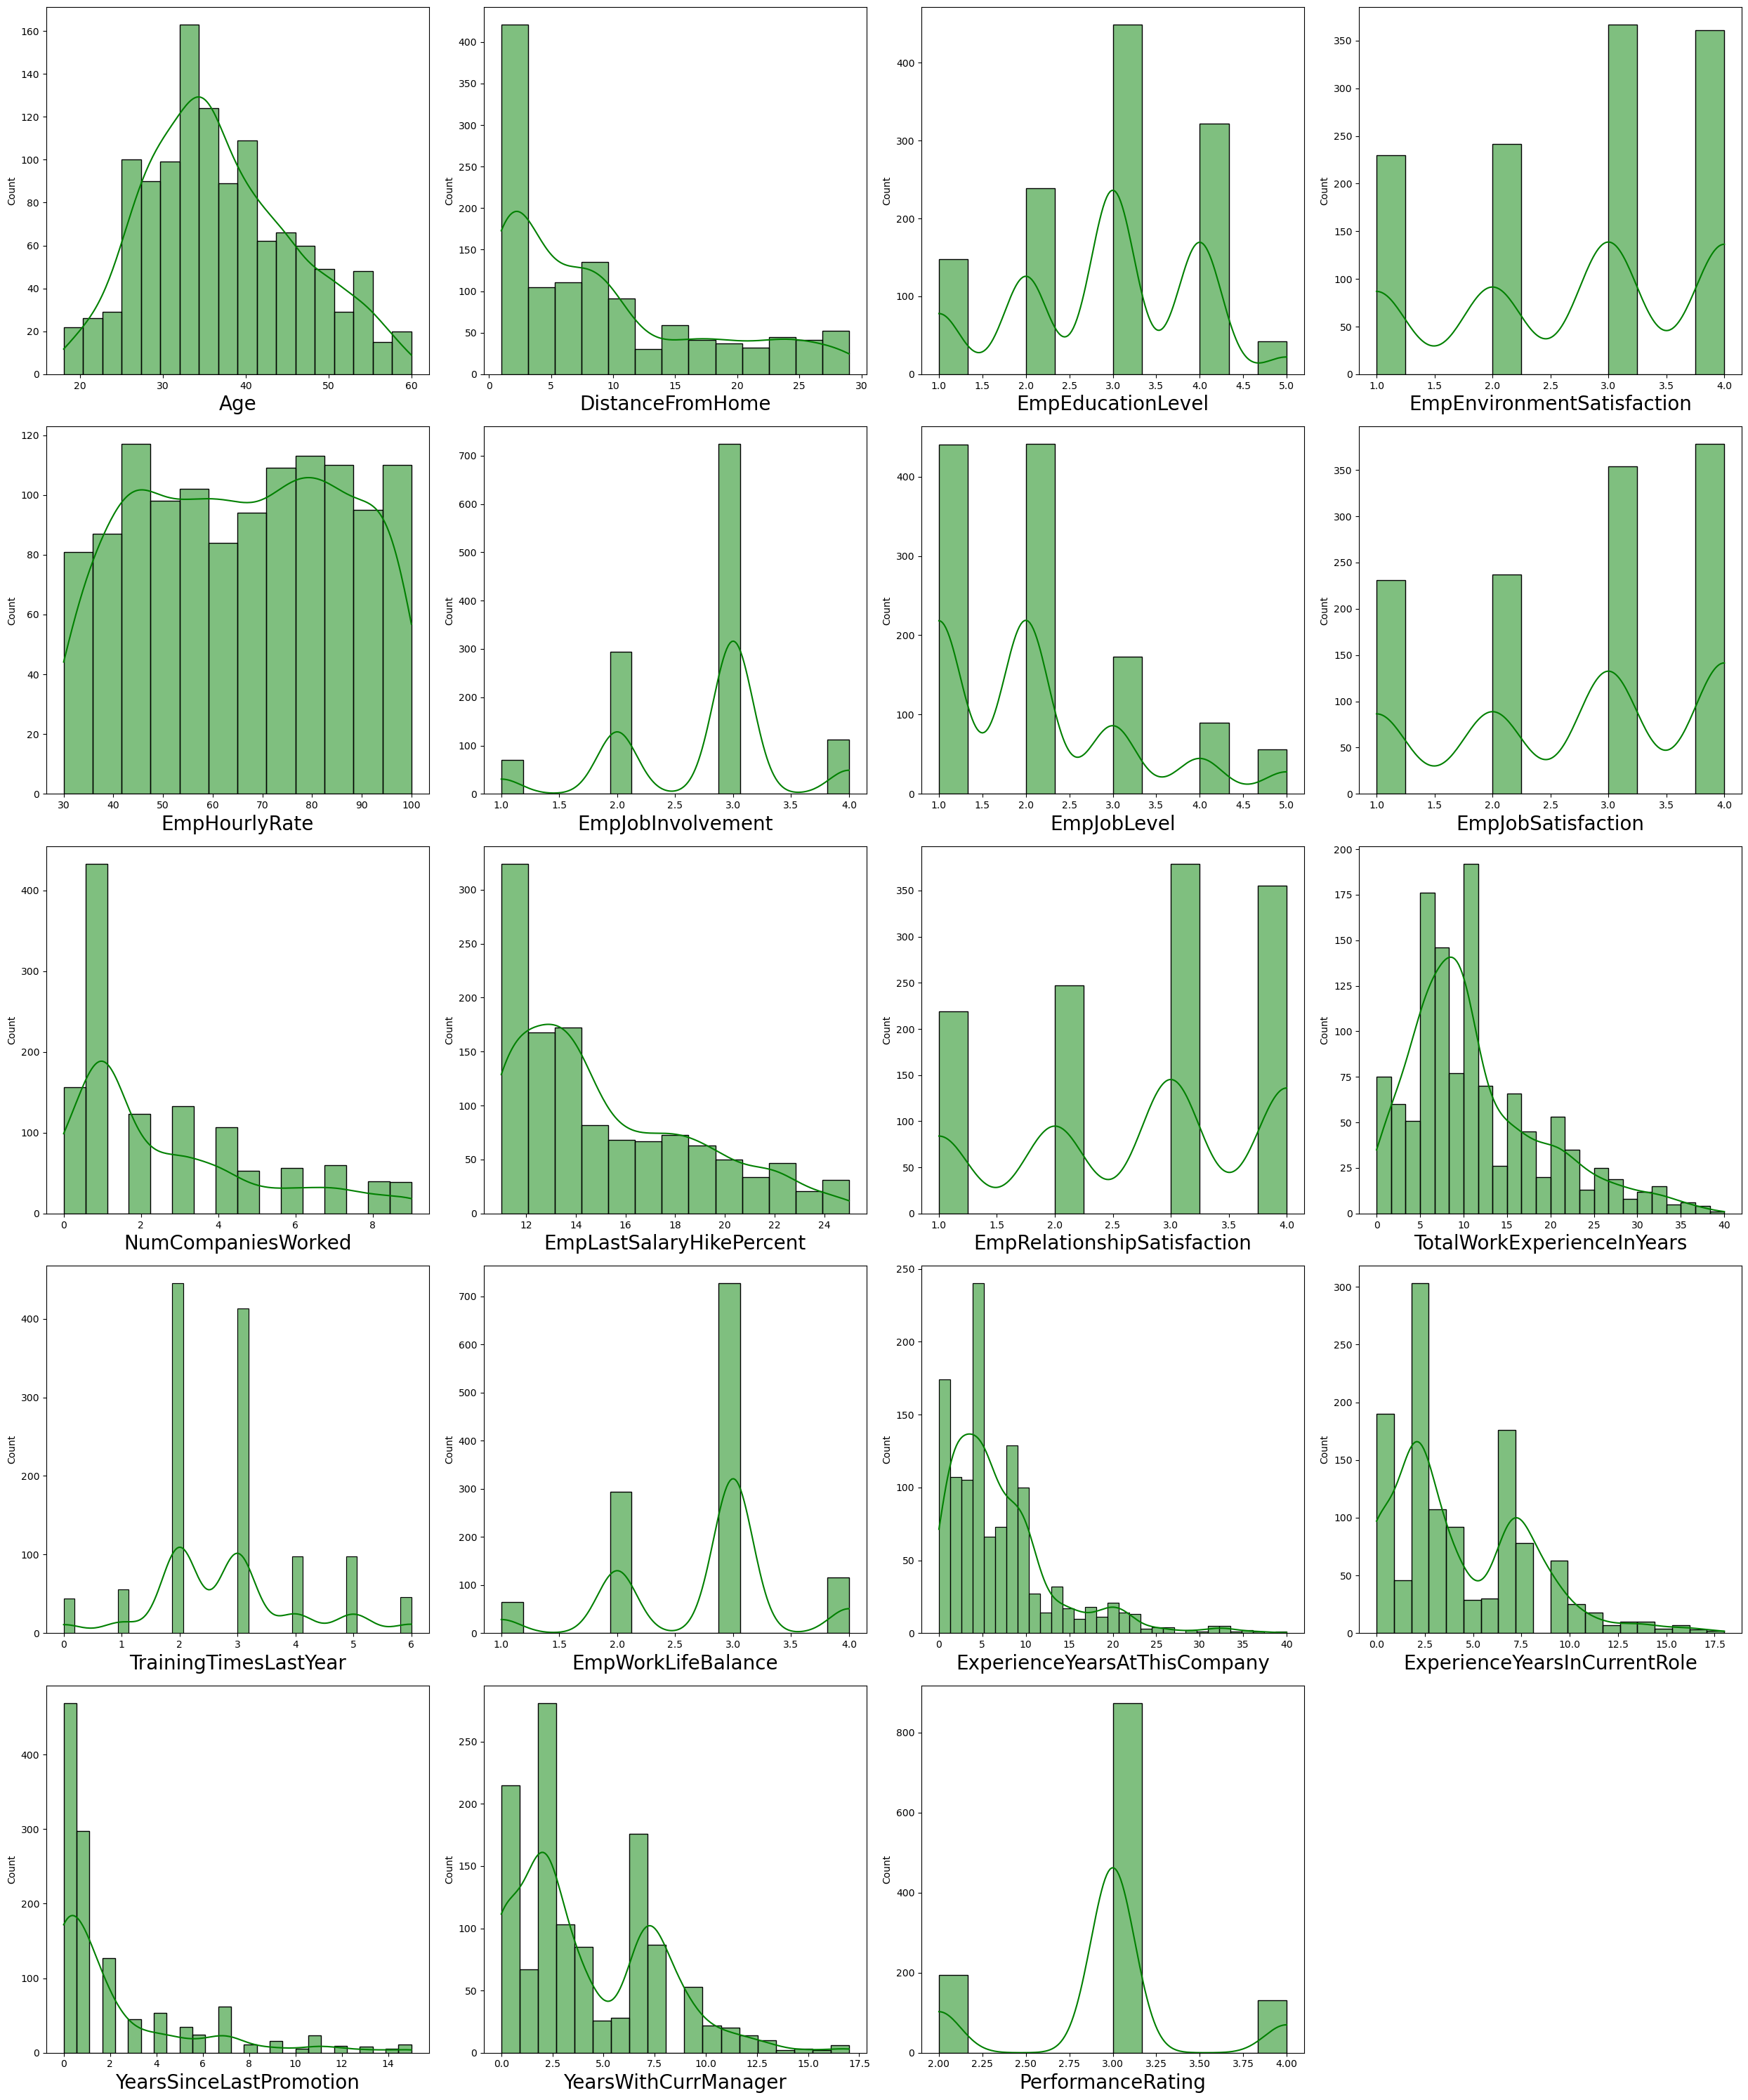

In [39]:
# Set the overall figure size for the plots
plt.figure(figsize=(25, 30))

# Initialize the plot counter
plt_num = 1

# Loop through each continuous (numerical) column
for column in continous_column:
    if plt_num <= 19:  # Limit to first 19 plots to fit nicely in grid
        # Create a subplot in a 5x4 grid
        plt.subplot(5, 4, plt_num)
        
        # Plot a histogram with a KDE (Kernel Density Estimate) overlay, colored green
        sns.histplot(continous_column[column], kde=True, color='green')
        
        # Set the x-axis label as the column name
        plt.xlabel(column, fontsize=20)
    
    # Increment the subplot counter
    plt_num += 1

# Adjust layout to prevent overlapping of subplots
plt.tight_layout()


#### Insights

**1. Age Distribution** - Bell-shaped (normal distribution) · Most employees aged **30–40** · Peak count in **30–35** age group  
**2. Distance From Home** - **Left-skewed** distribution · Most live **within 5 km** of work  
**3. Employee Education Level** - Majority at **levels 1–3** · Varied educational background overall  
**4. Environment Satisfaction** - Peaks at **levels 1, 3, and 4** · Fairly even distribution  
**5. Hourly Rate** - **Uniform distribution**, no clear peak · Mostly between **$30 to $100**  
**6. Job Involvement** - Peaks at **levels 2 and 3** · Less engagement at **1 and 4**  
**7. Companies Worked At** - Sharp peak at **0–1 years** · Fewer with **>5 years** experience across companies  
**8. Relationship Satisfaction** - Even distribution across **levels 1–4**  
**9. Total Work Experience** - Right-skewed · Most with **0–10 years**, few with **>20 years**  
**10. Training Times Last Year** - Most had **1–3 trainings** · Peak at **2 trainings**  
**11. Years Since Last Promotion** - Left-skewed · Most promotions **within 2 years**, few **>5 years**  
**12. Performance Rating** - Majority around **rating 3** · Very few below or above that


### 2. Count Plots (Categorical vs Categorical)

> Count plots visualize the frequency of categories, and are useful for analyzing categorical variables like Gender and Target.

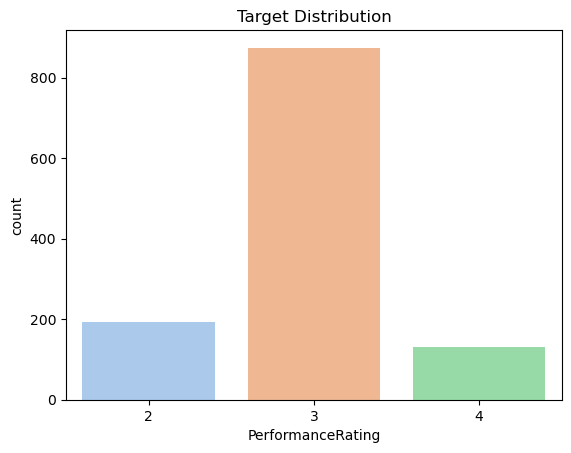

In [42]:
sns.countplot(x='PerformanceRating', data=data, palette='pastel')
plt.title("Target Distribution")
plt.show()

#### Insights

- **Rating Counts**
  - **Rating 2**: 200
  -  **Rating 3**: 900
  -   **Rating 4**: 100
- **Majority Ratings at Level 3**:
  - Most employees are rated as 3, indicating it is the standard or average performance level.
- **Low Extremes (Ratings 2 and 4)**:
  - Very few employees fall under rating 2 or 4, showing fewer very low or very high performers.
- **Interpretation**:
  - The performance rating distribution is centralized around 3, suggesting a uniform or conservative rating practice with minimal deviation.

In [44]:
# Select only categorical columns (object dtype)
categorical_columns = data.select_dtypes(include=['object'])
categorical_columns

EmpNumber  Gender EducationBackground MaritalStatus    EmpDepartment  \
0     E1001000    Male           Marketing        Single            Sales   
1     E1001006    Male           Marketing        Single            Sales   
2     E1001007    Male       Life Sciences       Married            Sales   
3     E1001009    Male     Human Resources      Divorced  Human Resources   
4     E1001010    Male           Marketing        Single            Sales   
...        ...     ...                 ...           ...              ...   
1195   E100992  Female             Medical      Divorced            Sales   
1196   E100993    Male       Life Sciences        Single      Development   
1197   E100994    Male             Medical       Married      Development   
1198   E100995  Female             Medical        Single     Data Science   
1199   E100998  Female       Life Sciences        Single            Sales   

            EmpJobRole BusinessTravelFrequency OverTime Attrition  
0      Sales Executive           Travel_Rarely       No        No  
1      Sales Executive           Travel_Rarely       No        No  
2      Sales Executive       Travel_Frequently      Yes        No  
3              Manager           Travel_Rarely       No        No  
4      Sales Executive           Travel_Rarely       No        No  
...                ...                     ...      ...       ...  
1195   Sales Executive       Travel_Frequently      Yes        No  
1196  Senior Developer           Travel_Rarely       No        No  
1197  Senior Developer           Travel_Rarely      Yes        No  
1198    Data Scientist           Travel_Rarely       No        No  
1199   Sales Executive           Travel_Rarely       No       Yes  

[1200 rows x 9 columns]

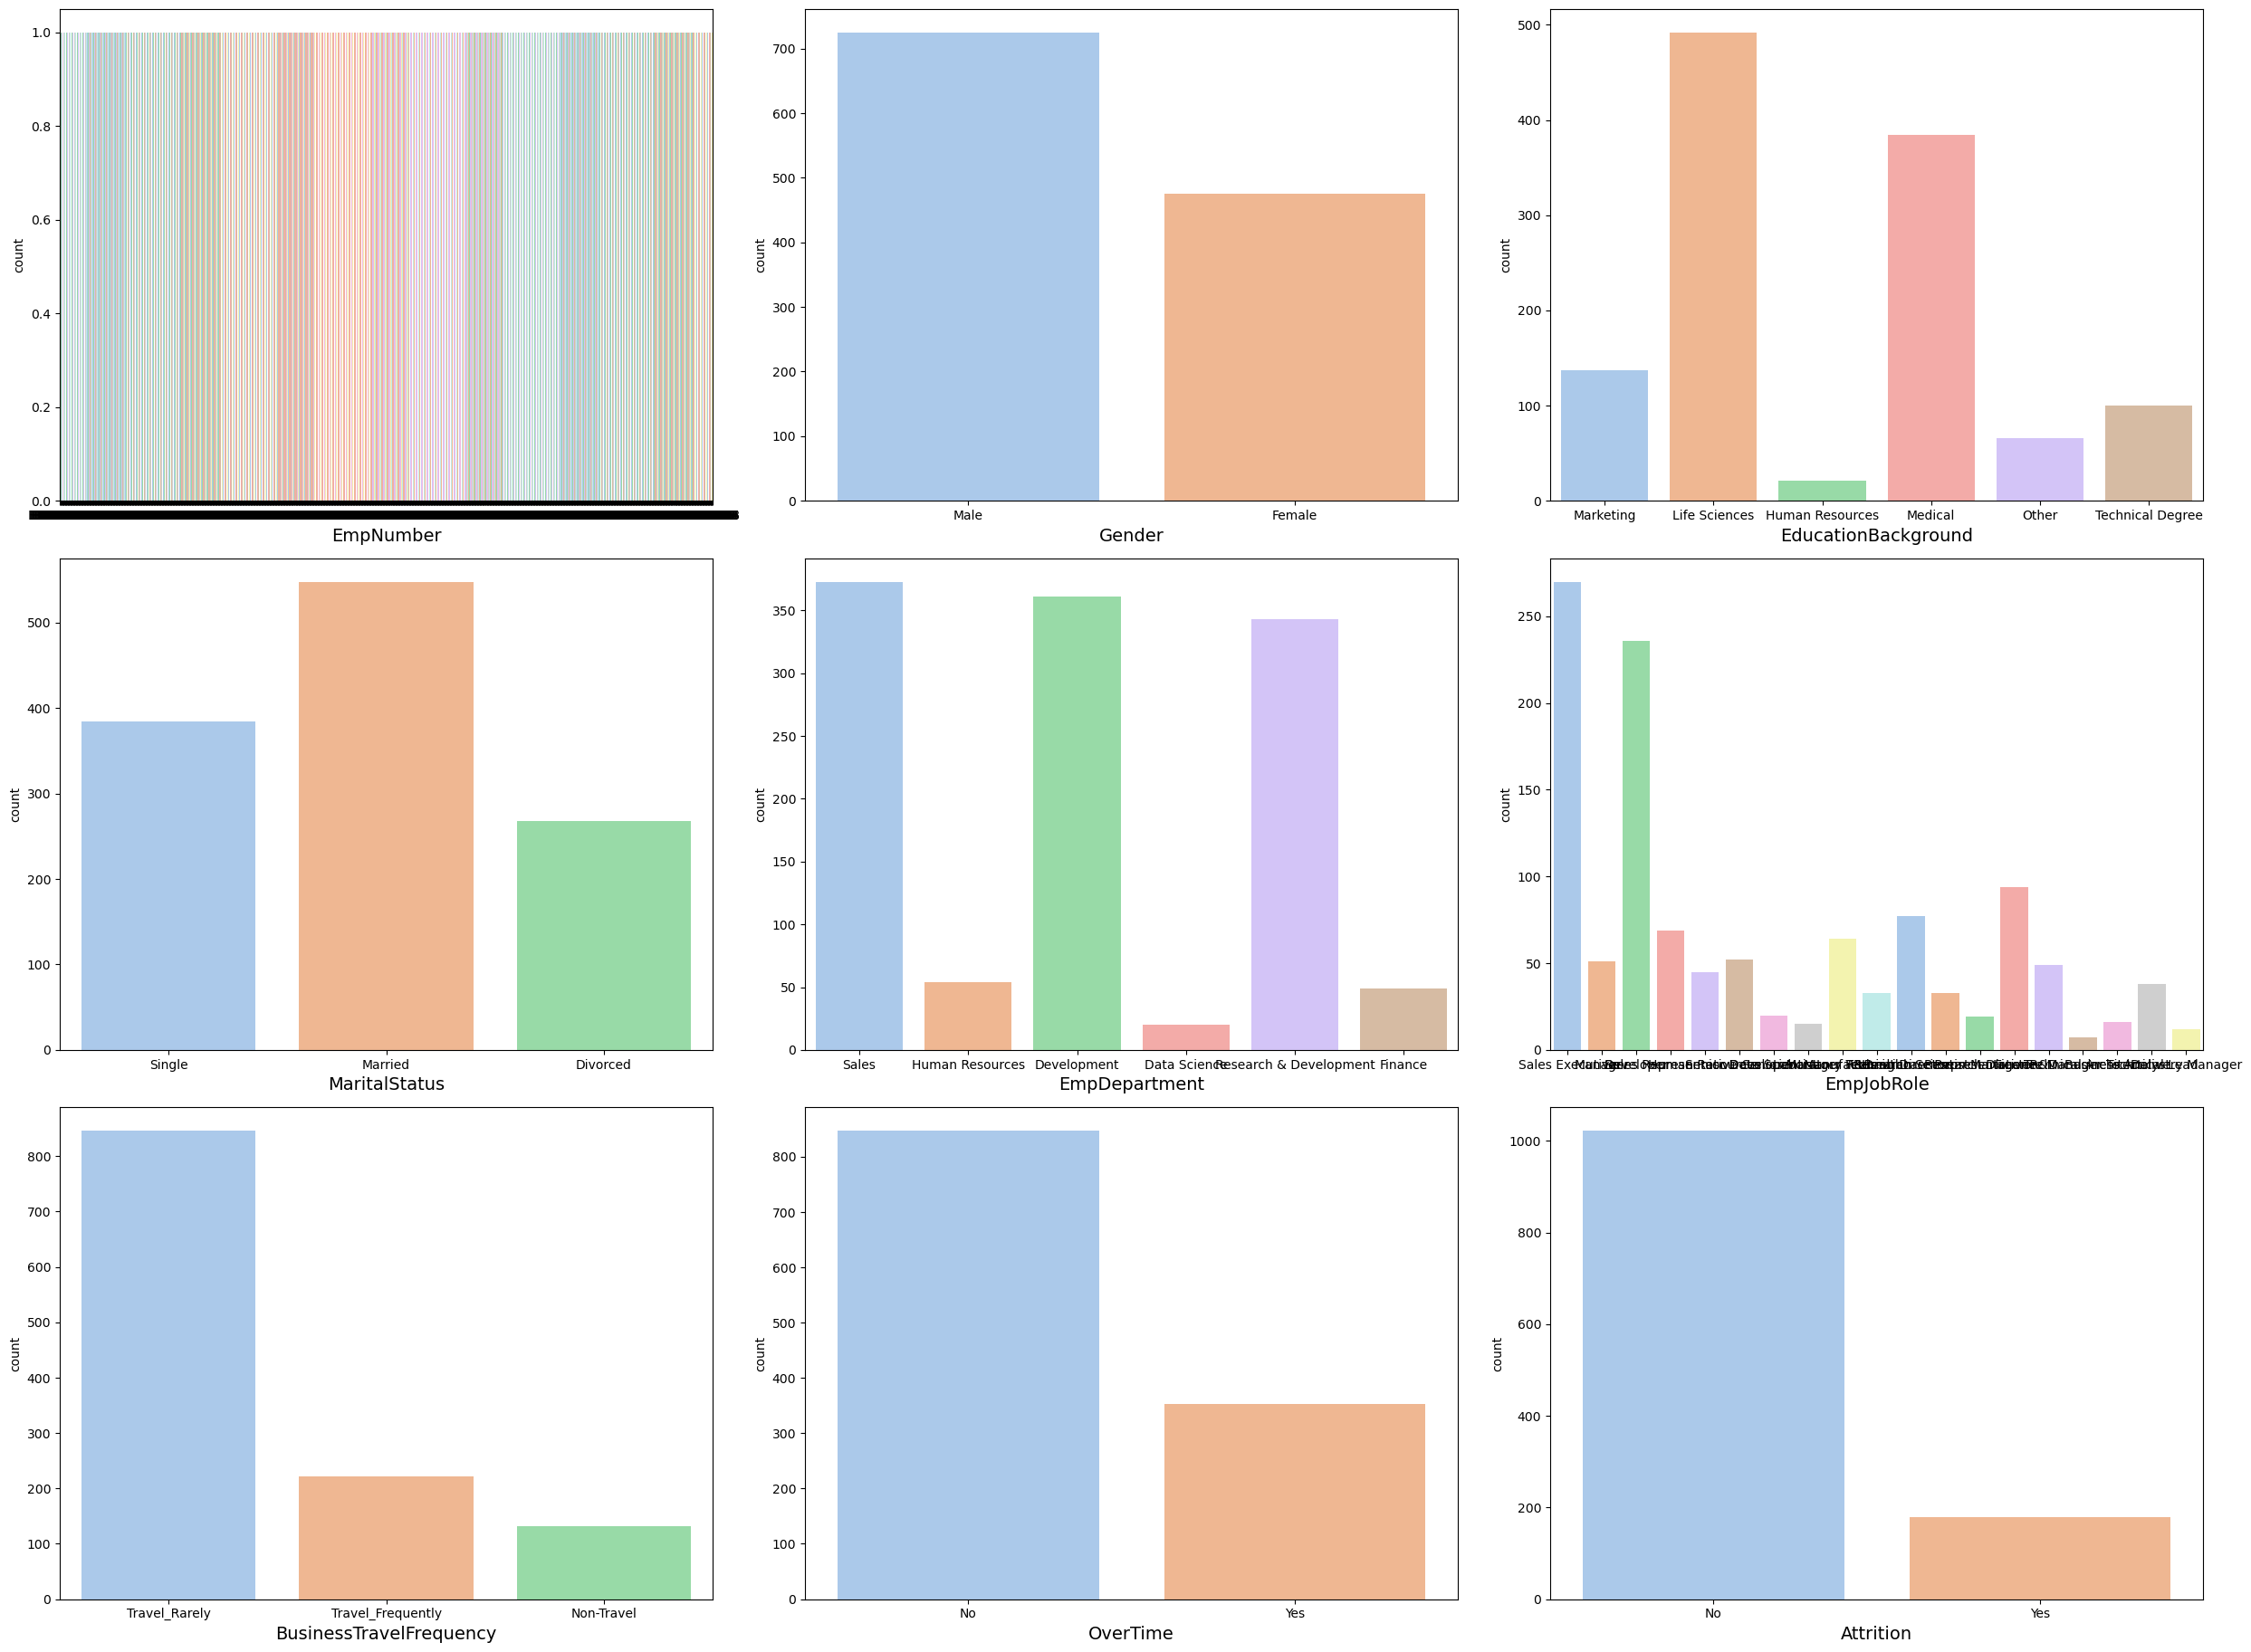

In [45]:
# Set the figure size
plt.figure(figsize=(25, 30))

# Plot counter
plt_num = 1

# Loop through each categorical column and plot barplot
for column in categorical_columns:
    if plt_num <= len(categorical_columns.columns):
        plt.subplot(5, 3, plt_num)  # Adjust rows/cols based on number of plots
        sns.countplot(data=data, x=column, palette='pastel')  # Barplot for count of each category
        plt.xlabel(column, fontsize=14)
        plt_num += 1

# Adjust layout
plt.tight_layout()


#### 1. Performance Rating Distribution
- **Rating 3** is the most common with **900+ employees**.
- **Rating 2** and **Rating 4** are less common with approx. **200** and **300** employees respectively.
#### 2. Demographic Insights
- **Gender**: More **Male** employees (~700) than **Female** (~400).
- **Marital Status**: **Married**: ~500, **Single**: ~300, **Divorced**: ~200
- **Education Field**: **Life Sciences** is most common (~500). Others include **Human Resources** and **Medical** with fewer employees.
#### 3. Employment Distribution
- **Employee Number**: Fairly uniform distribution; no major skew.
- **Departments**: **Human Resources** and **Sales** have the highest employee counts (~300 each). **Finance** and other departments have smaller representations.
- **Business Travel**: Most employees travel **Rarely** (>800). Few are **Frequent Travelers** or **Non-Travelers**.
- **Overtime**: Majority **do not work overtime** (>800). Around **300** employees **work overtime**.
- **Attrition**: Most employees have **not faced attrition** (>900). ~200 employees have experienced **attrition**.
#### 4. Role Insights
- Employees are spread across different roles. Roles vary in attrition rates and departmental distribution.
#### 5. Conclusion
- The workforce is predominantly **male**, **married**, and **from Life Sciences background**.
- **Performance Rating 3** is the norm.
- **Low overtime** and **low attrition** suggest employee stability.
- Useful for HR strategy, resource allocation, and organizational planning.


## Bivariate Analysis
>  **Definition:**
 >  
The purpose of bivariate analysis is to explore and understand the relationships between two variables, identifying patterns, correlations, or associations.


### 1. Bar Plots (Numerical vs Categorical)
> Bar plots are used to visualize the average of a numerical variable across different categories (such as Target, Gender, etc.)

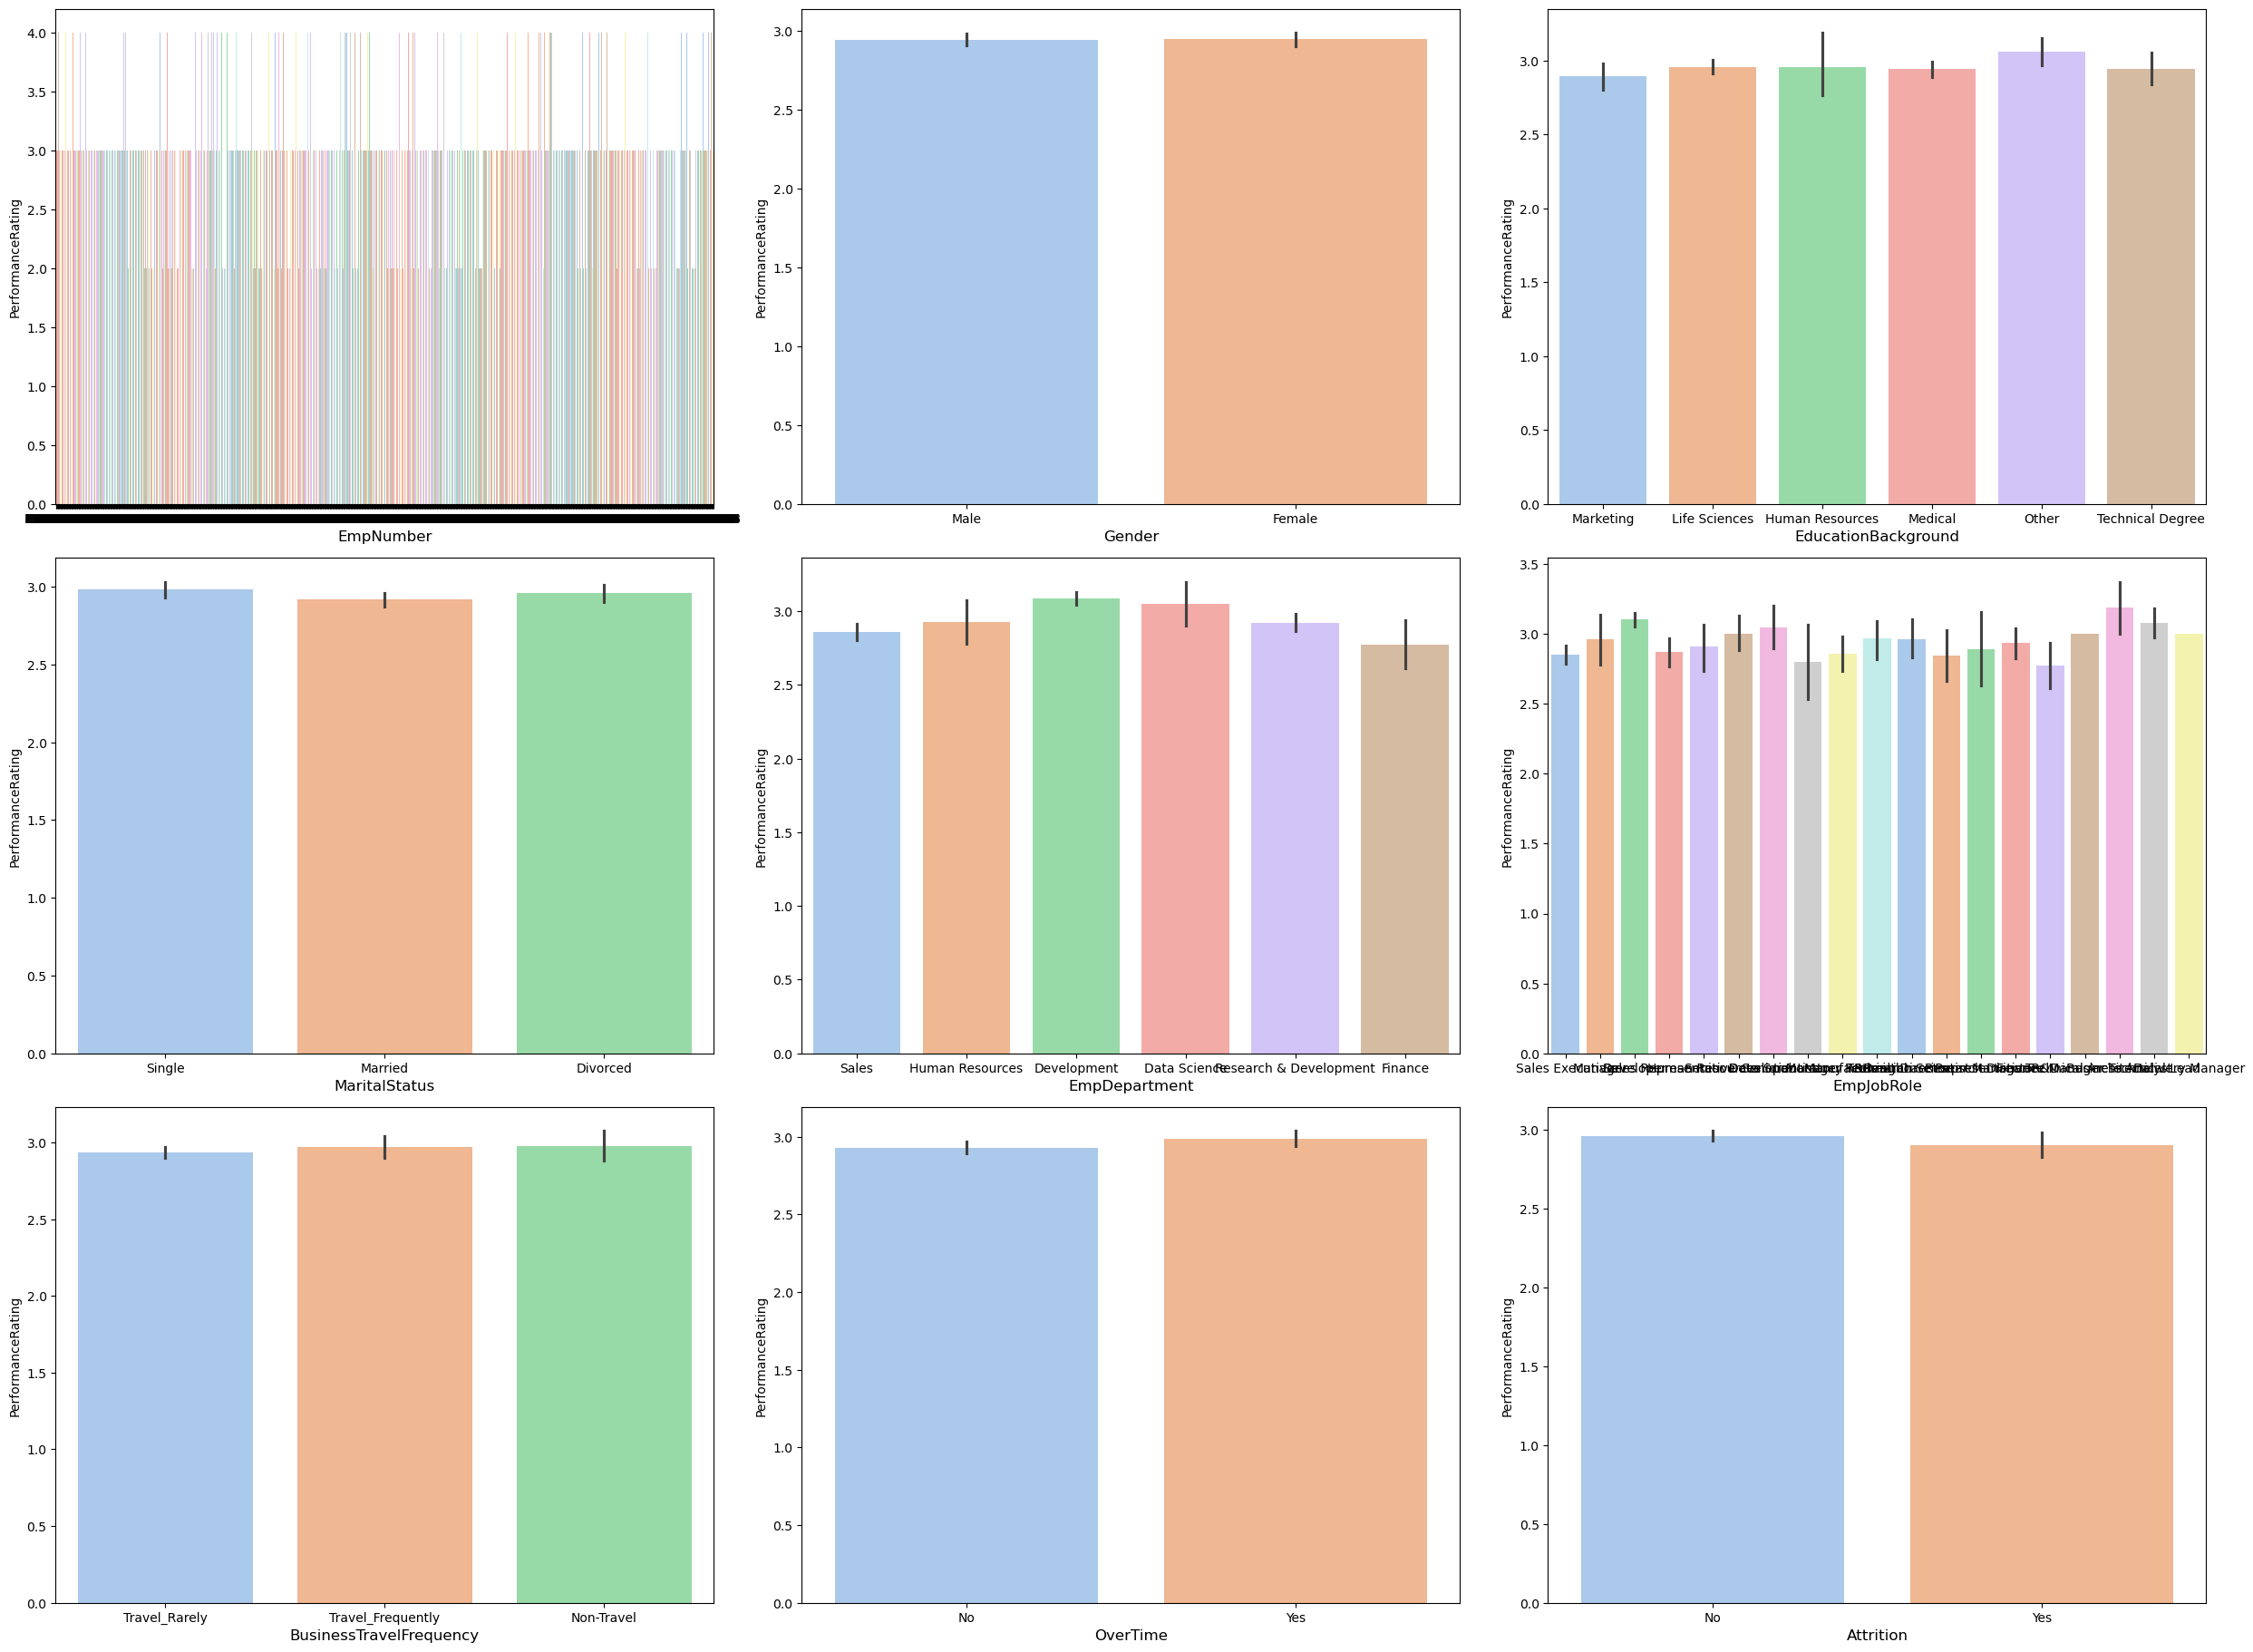

In [52]:
# Set the figure size for the entire plot grid
plt.figure(figsize=(25, 30))

# Loop through each categorical column to create barplots
plot_num = 1
for column in categorical_columns:
    plt.subplot(5, 3, plot_num)  # Create subplot in a 5-row, 3-column grid
    sns.barplot(x=column, y='PerformanceRating', data=data, palette='pastel') # Create a barplot with PerformanceRating as the Y-axis
    # Set axis labels
    plt.xlabel(column, fontsize=12)
    # Increment plot number
    plot_num += 1

# Adjust spacing
plt.tight_layout()
plt.show()


#### 1. Performance Ratings by Employee Number
- Performance ratings are fairly consistent across employee IDs, indicating low variability.

#### 2. Gender Impact
- Both male and female employees show similar average performance ratings.

#### 3. Education Background
- Fields include Marketing, Life Sciences, HR, Medical, Technical, and Others.
- Ratings show slight variation but no strong influence from education type.

#### 4. Marital Status
- Categories: Single, Married, Divorced.
- No significant differences observed in performance ratings across statuses.

#### 5. Departmental Ratings
- Departments include Sales, HR, Development, Data Science, R&D, and Finance.
- Performance scores are largely uniform across departments.

#### 6. Business Travel Frequency
- Categories: Rarely, Frequently, Non-travel.
- Travel frequency does not significantly affect performance outcomes.

#### 7. Overtime Impact
- Employees working overtime vs. those who don’t show minor rating differences.

#### 8. Attrition Analysis
- Employees who left have similar performance ratings as those who stayed.

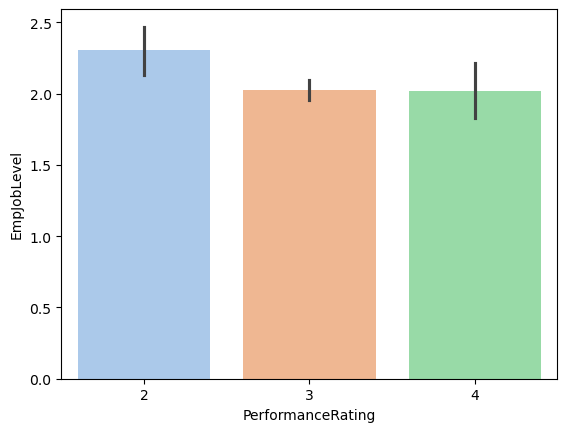

In [54]:
# BarPlot: performance_rating vs emp_job_level
sns.barplot(x= data.PerformanceRating, y= data.EmpJobLevel, data=data, palette='pastel') 
# performance_rating on x-axis and emp_job_level on y-axis
plt.show() # Displaying the plot

**Insights**

* Employees with higher job levels generally have better performance ratings.
* More Average Ratings: Employees at lower levels mostly score around average (rating 3).
* These groups have fewer high performance (rating 4) scores.

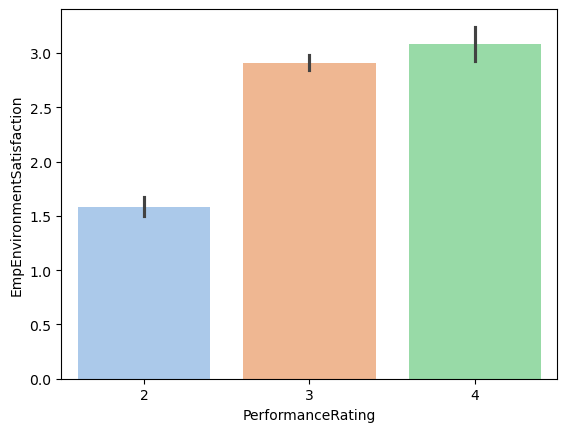

In [56]:
# BarPlot: performance_rating vs emp_evnironment_satisfaction
sns.barplot(x= data.PerformanceRating, y= data.EmpEnvironmentSatisfaction, data=data, palette='pastel') 
# performance_rating on x-axis and emp_evnironment_satisfaction on y-axis
plt.show() # Displaying the plot

**Insights**

* Employees with better performance ratings tend to have higher environment satisfaction.
* (Rating 3): These employees show moderate satisfaction levels overall.
* (Rating 2): These employees have the lowest environment satisfaction on average.
* There seems to be a positive link between satisfaction at work and performance.

## Multivariate Analysis (Multiple Variable Analysis)
> **Definition:**
>  
Multivariate analysis examines the relationships between more than two variables simultaneously. This approach helps in understanding the complex interactions between multiple factors that may influence the outcome variable.

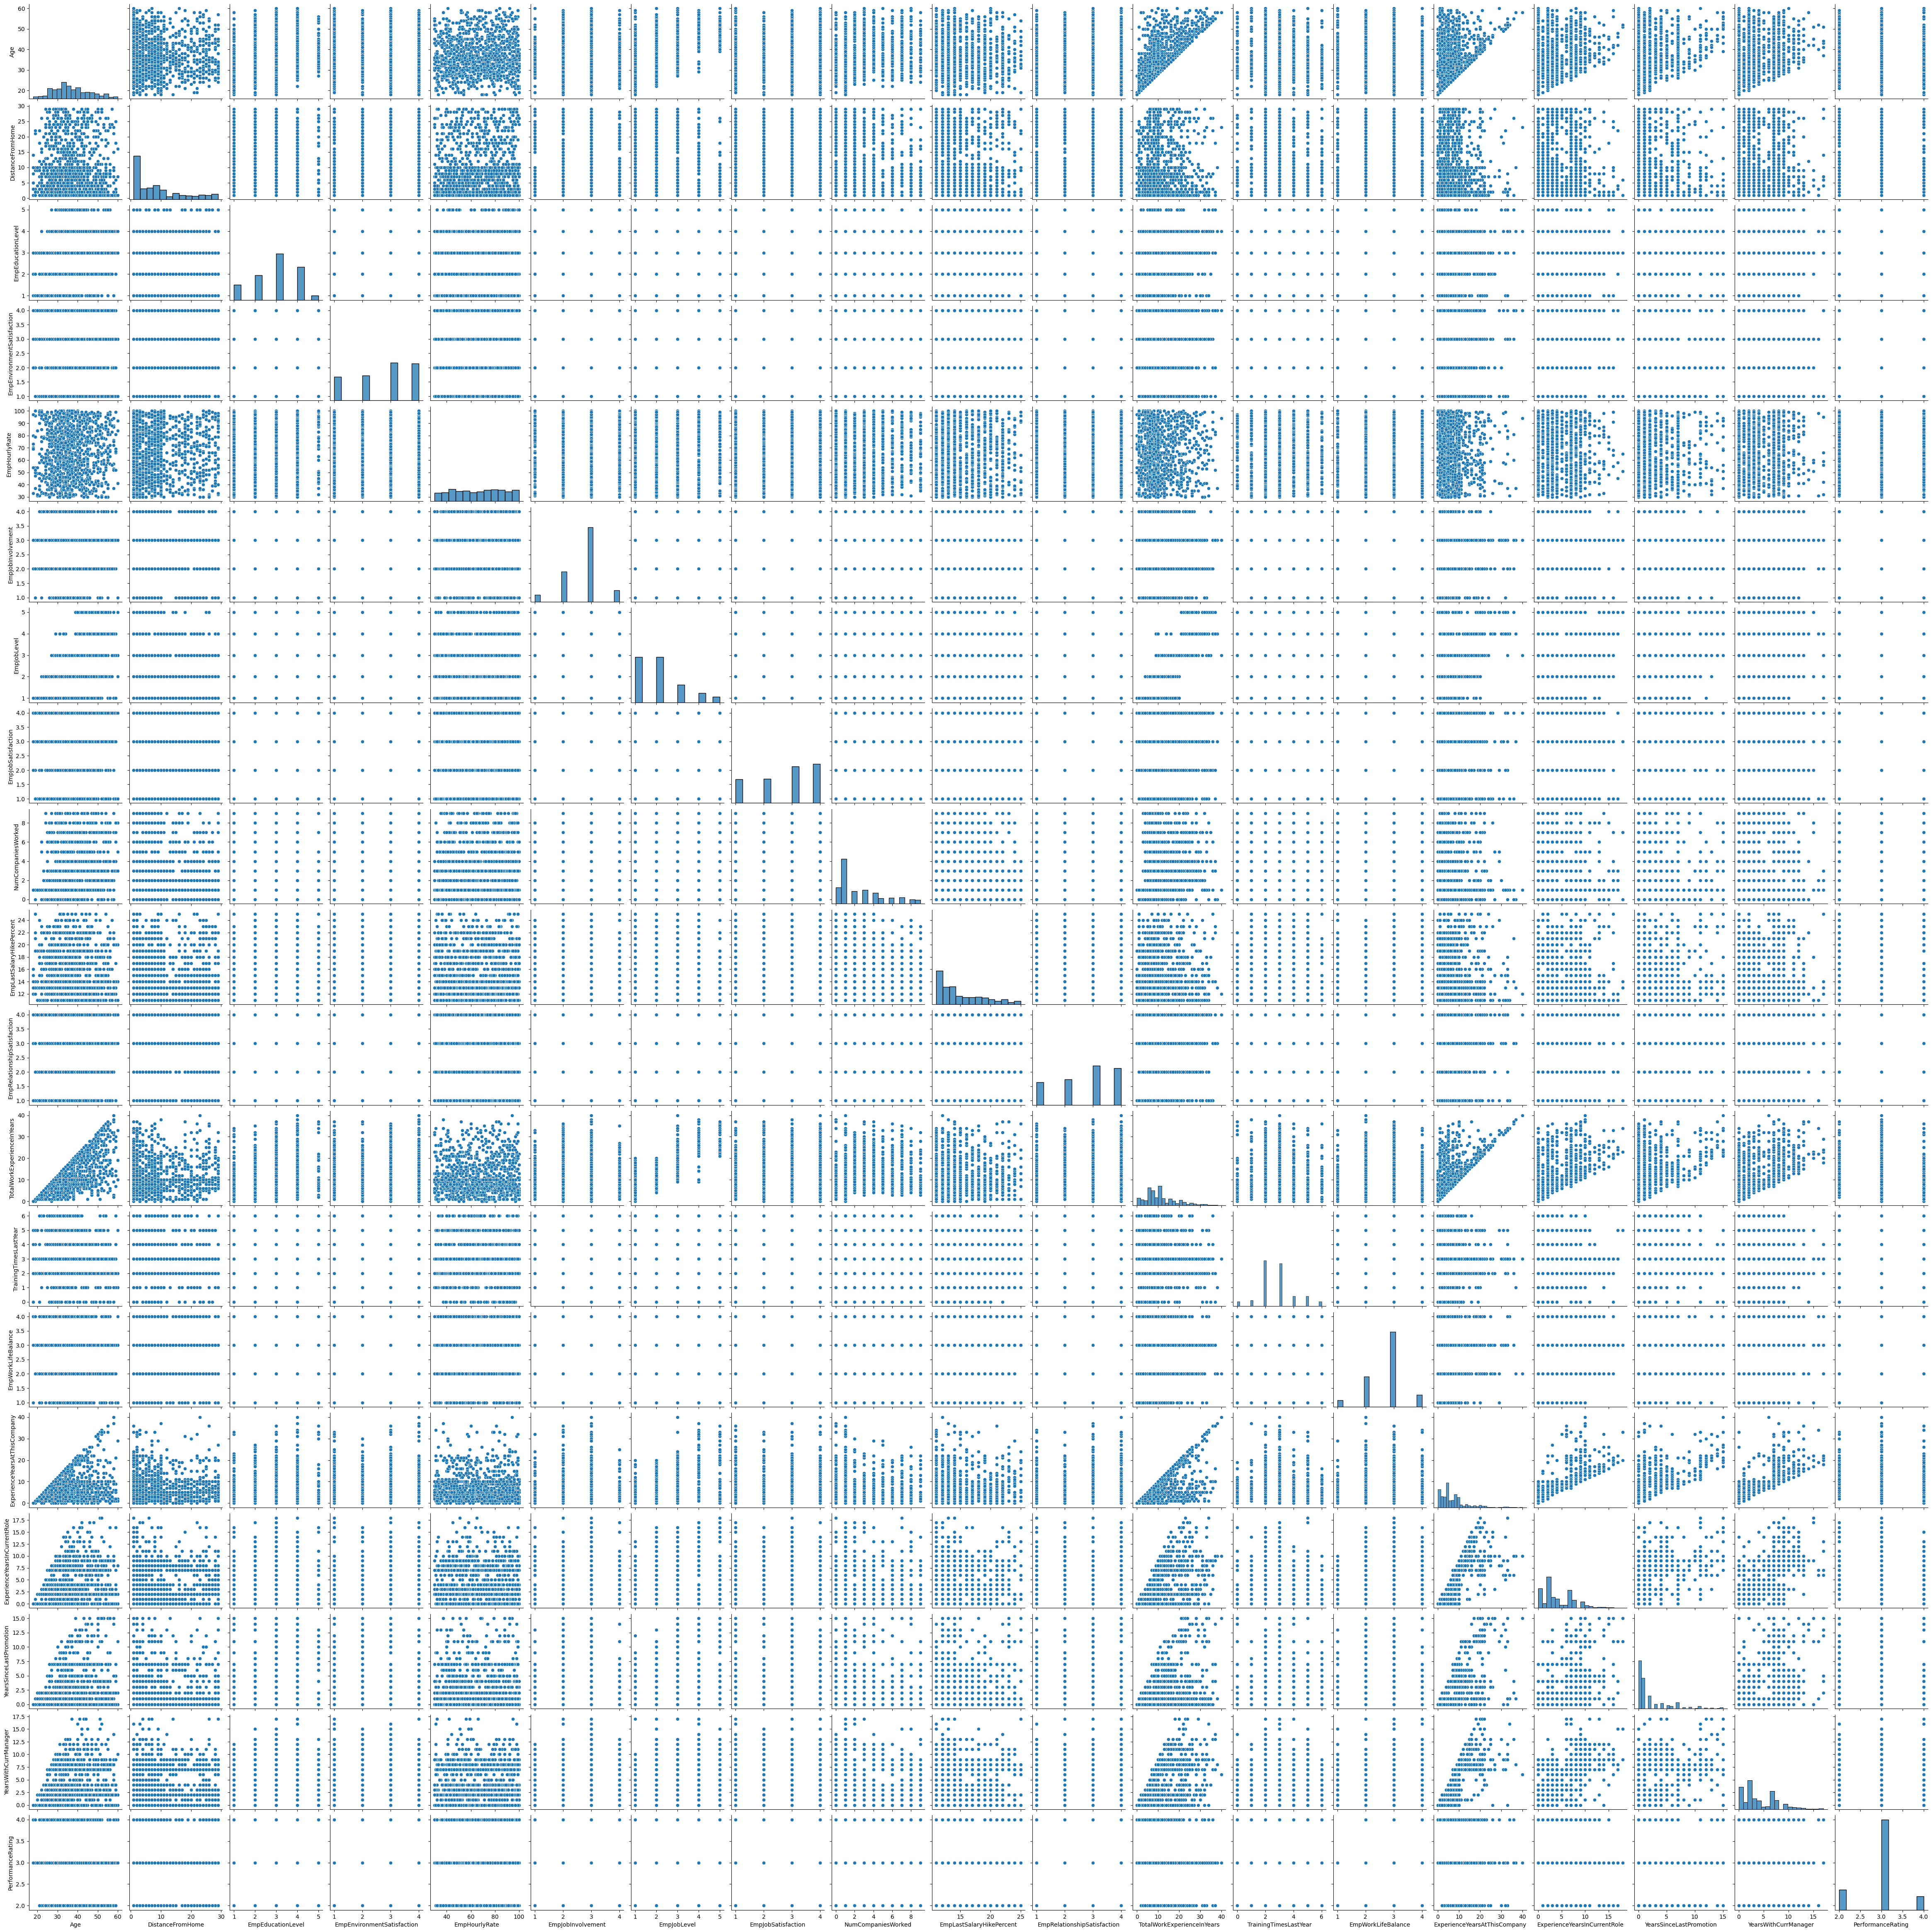

In [59]:
sns.pairplot(data)

**Insights:-**
* Observe pair plots to identify linear or non-linear relationships between features.
* We are effective way to visualize relationships between numerical variables but here we are not visiulize the data.

### Final EDA Report

- Employees with **"Other" education backgrounds** show unique performance patterns.
- **Development department** employees have **higher performance ratings**.
- Most employees who **travel frequently** have **lower performance ratings**.
- **Gender**: Male and female employees perform **similarly**.
- **Education Background**: Employees from **Life Sciences, Medical, and Marketing** show **lower performance**.
- **Marital Status**: **Married** employees tend to have **lower performance ratings**.
- **Departments**: Employees in **Sales, Finance, and R&D** show **lower performance**.
- **Travel Distance**: Employees traveling **frequently and over 15km** show **lower performance**.
- **Environment Satisfaction**: Employees rating it **1 or 2** tend to perform **poorly**.
- **Hourly Rate**: Employees with **high hourly rates (>80)** and **no overtime** tend to perform **poorly**.
- **Salary Hike %**: Employees with **less than 20% hike** show **lower performance**.
- **Years at Company**: Employees with **15–25 years experience** perform **poorly**.
- **Years in Current Role**: Employees with **6–12 years** in the same role show **lower performance**.
- **Years Since Promotion**: Employees **not promoted in the last 4+ years** show **lower performance**.
- **Years with Current Manager**: Employees who worked **more than 7 years with the same manager** tend to have **lower performance**.

### Key Influential Features

The top three features affecting performance ratings are:
- `EmpLastSalaryHikePercent`
- `YearsSinceLastPromotion`
- `ExperienceYearsInCurrentRole`


<h1 style="text-align: center;"><strong>Feature Engineering</strong></h1>


#### **Definition:** 
>
> Feature Engineering is the process of selecting, modifying, or creating new features (variables or attributes) from raw data to improve the performance of machine learning models. It plays a critical role in building more accurate and efficient models
by transforming data to better expose meaningful patterns to algorithms.

There are two main types:
- **Data Preprocessing**
- **Feature Selection**

## 1. Data Preprocessing

Data preprocessing involves cleaning, transforming, and organizing raw data into a suitable format for analysis or machine learning models. It includes the following steps:

- **Check for Null Values**: Identify and handle missing values using imputation techniques (mean, median, mode).
- **Handle Outliers**: Detect and treat outliers using statistical methods like IQR or Z-score.
- **Encoding Techniques**: Convert categorical data into numerical form using Label Encoding or One-Hot Encoding.
- **Transform Methods**: Apply transformations such as log or box-cox to stabilize variance or normalize distributions.
- **Scaling Techniques**: Normalize feature values using StandardScaler or MinMaxScaler to bring all features to a similar scale.

In [64]:
data.isnull().sum() # check the null values

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### Outliers Handling

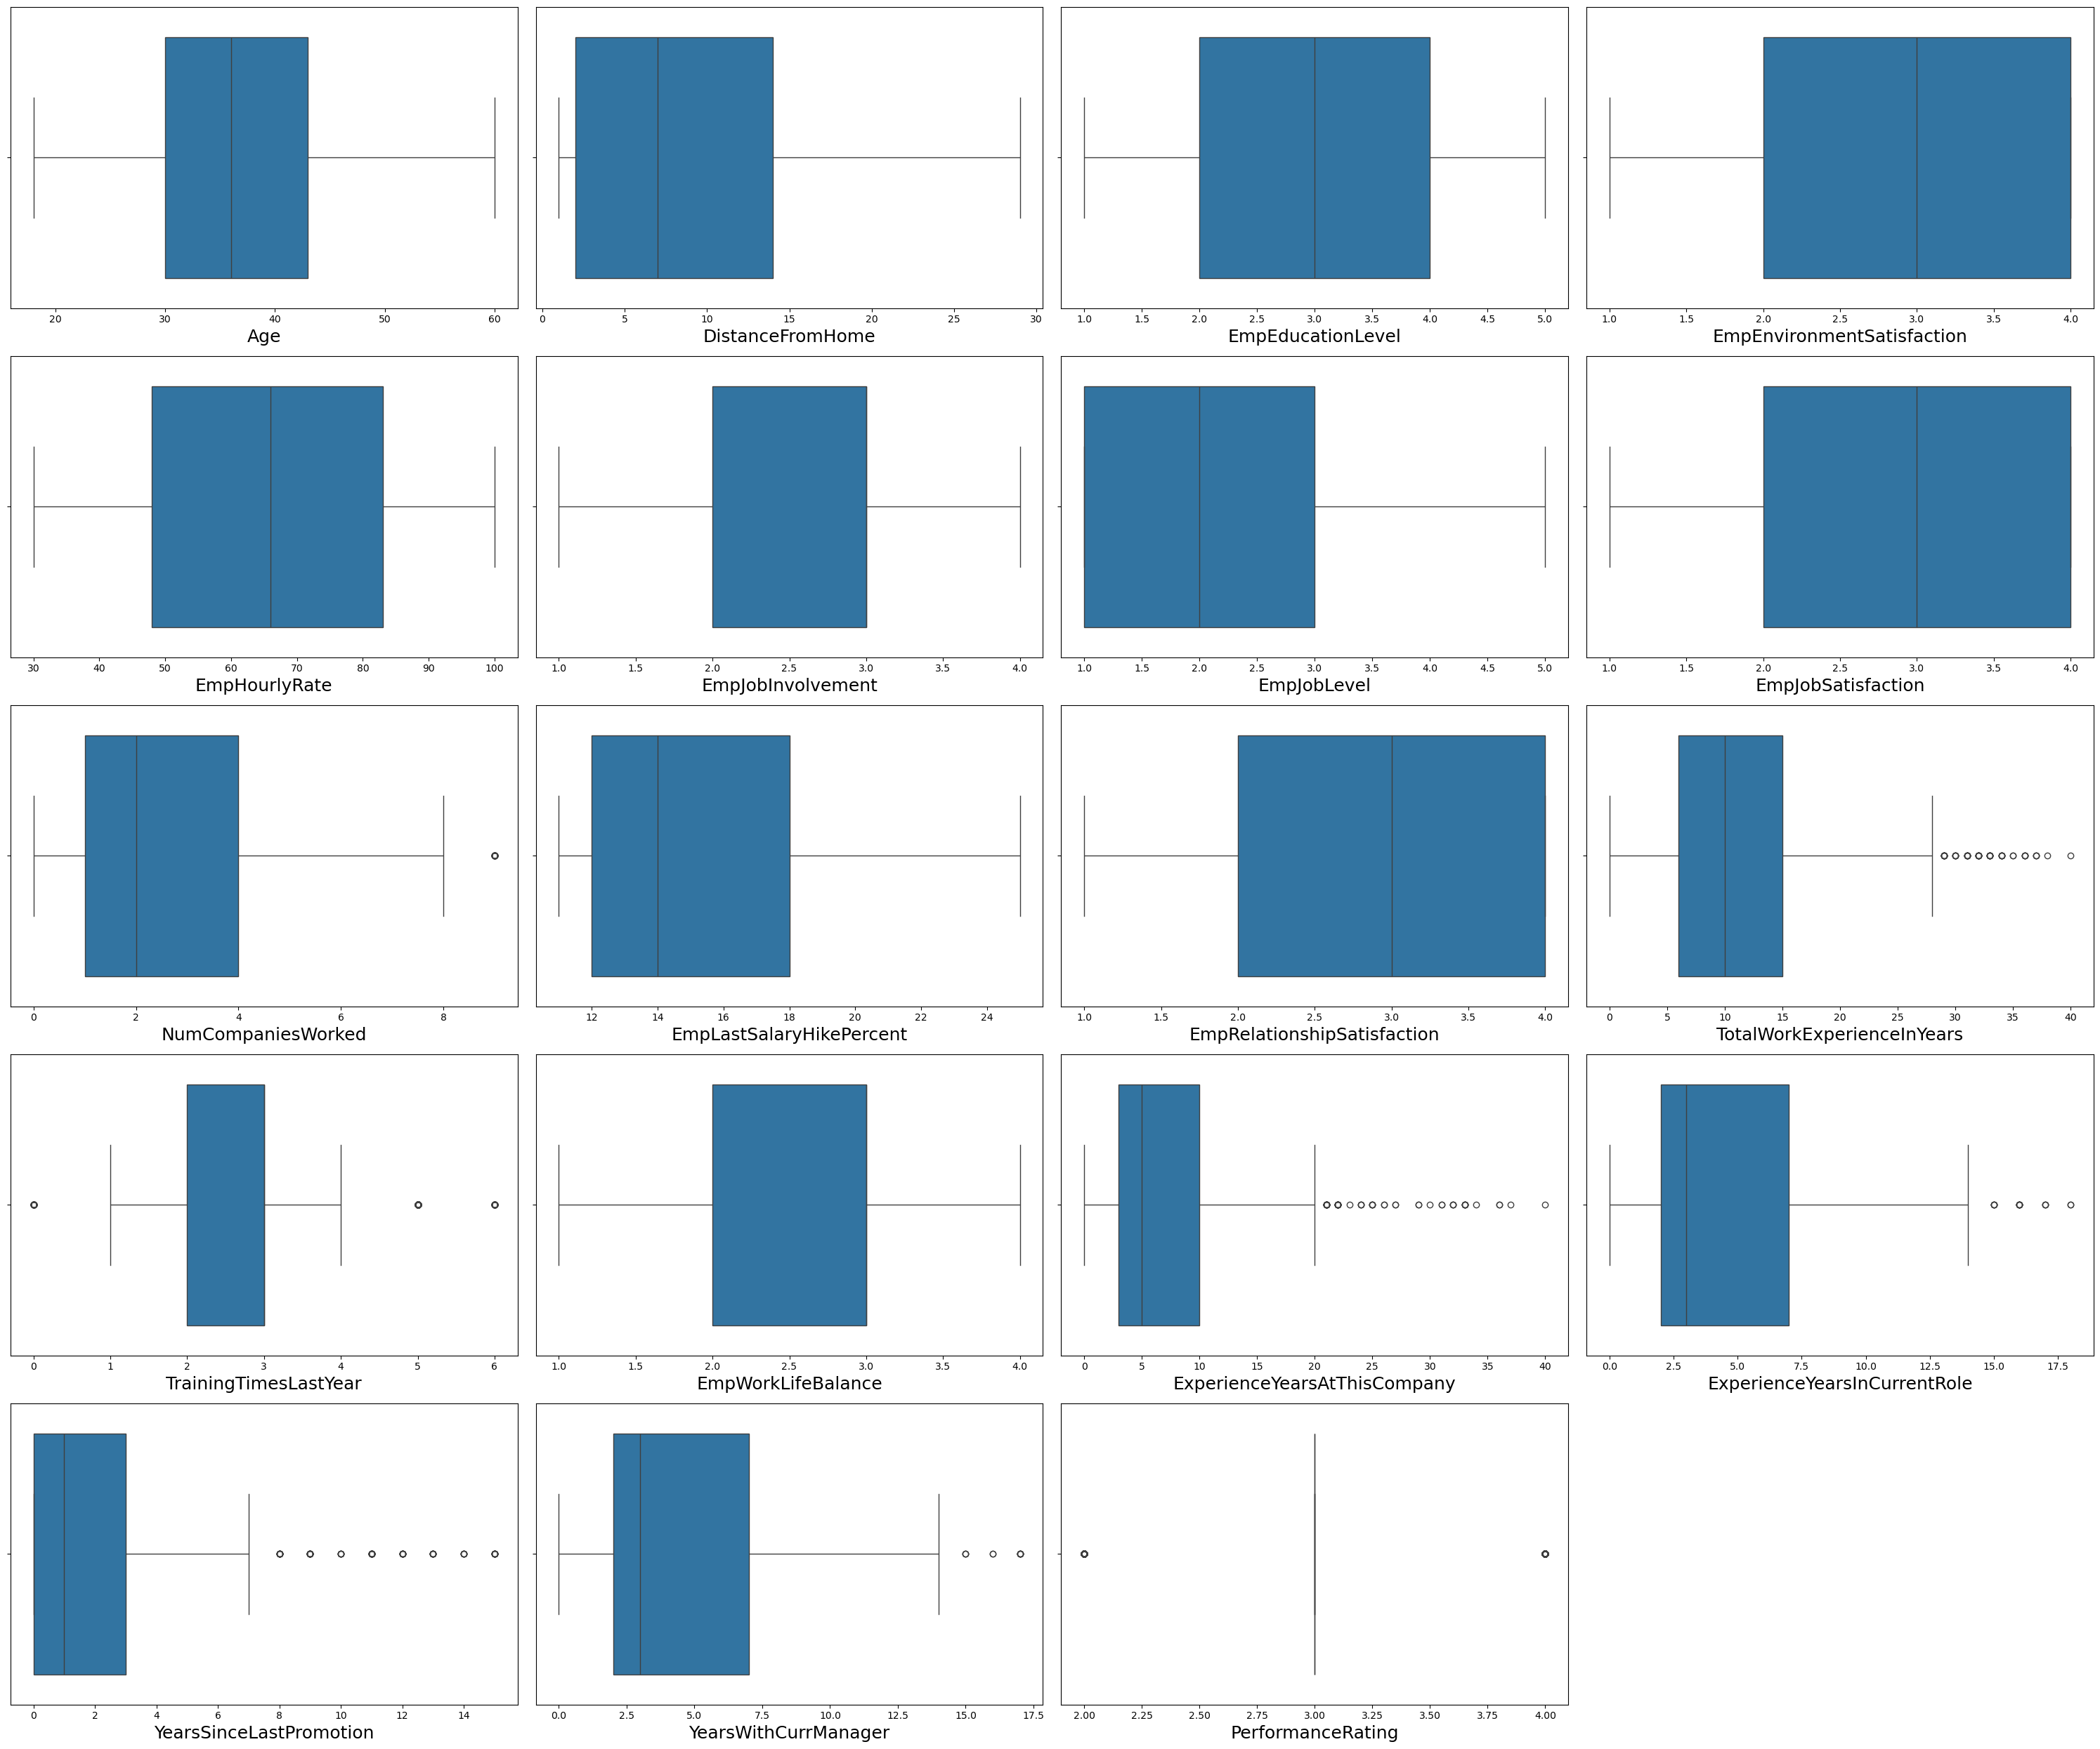

In [66]:
plt.figure(figsize=(30, 25))  # Bigger plot size for better visibility
plt_num = 1

for column in continous_column:  # Loop through each column
    if plt_num <= 19:
        plt.subplot(5, 4, plt_num)  # 5x4 grid
        sns.boxplot(x=data[column])  # Boxplot to check outliers
        plt.xlabel(column, fontsize=18)  # X-axis label
        plt_num += 1

plt.tight_layout()  # Adjust spacing
plt.show()  # Show plots

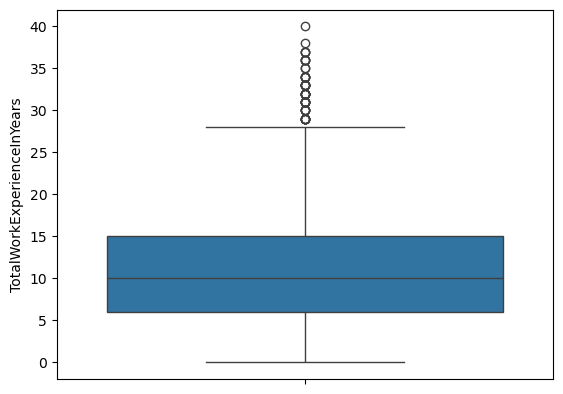

In [67]:
sns.boxplot(data["TotalWorkExperienceInYears"]) # check the outliers 
plt.show()

In [68]:
data.TotalWorkExperienceInYears.median # find the median value of this column

<bound method Series.median of 0       10
1       20
2       20
3       23
4       10
        ..
1195     6
1196     4
1197    20
1198     9
1199     4
Name: TotalWorkExperienceInYears, Length: 1200, dtype: int64>

In [69]:
data.loc[data["TotalWorkExperienceInYears"] >= 17,"TotalWorkExperienceInYears"] = 10.0 # handle the outliers using median value

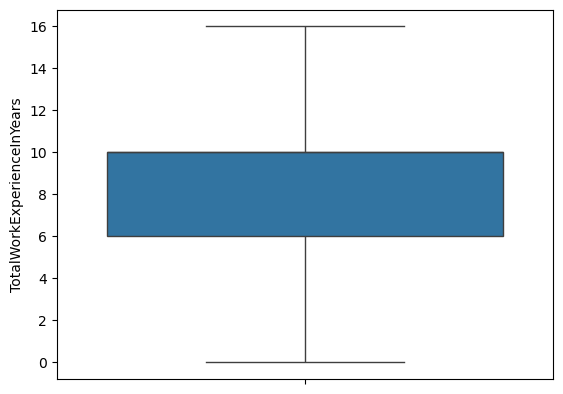

In [70]:
sns.boxplot(data["TotalWorkExperienceInYears"]) # check the otliers 
plt.show()

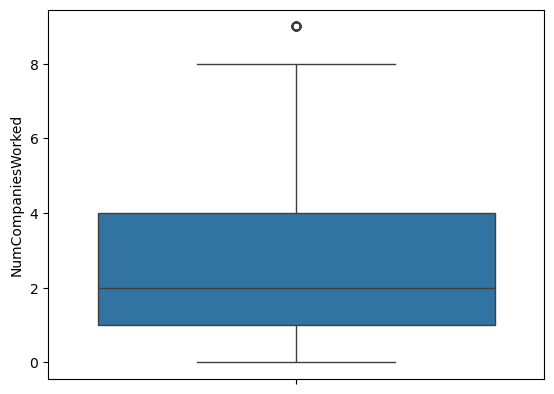

In [71]:
sns.boxplot(data["NumCompaniesWorked"]) # check the otliers 
plt.show()

In [72]:
data.NumCompaniesWorked.median() # find the median value of this column

2.0

In [73]:
data.loc[data["NumCompaniesWorked"] >= 7,"NumCompaniesWorked"] = 2.0 # handle the outliers using median value

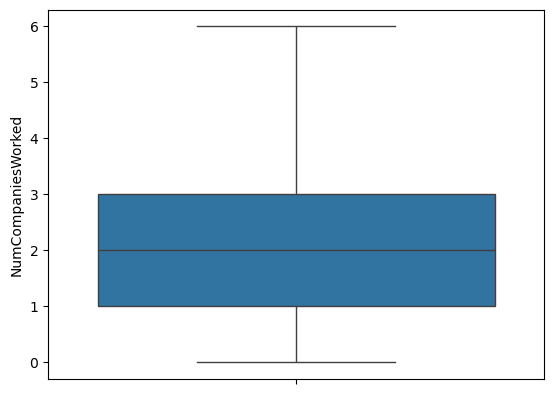

In [74]:
sns.boxplot(data["NumCompaniesWorked"]) # check the otliers 
plt.show()

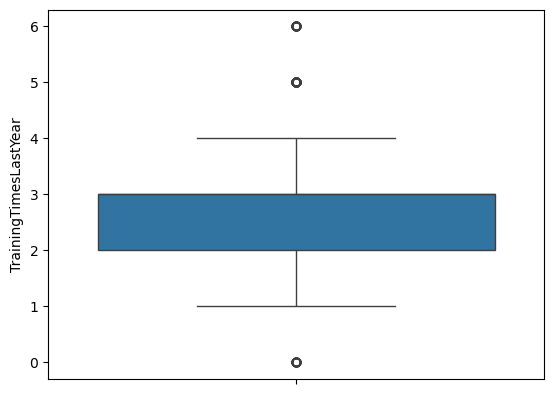

In [75]:
sns.boxplot(data["TrainingTimesLastYear"]) # check the otliers
plt.show()

In [76]:
data.TrainingTimesLastYear.median() # find the median value of this column

3.0

In [77]:
data.loc[data["TrainingTimesLastYear"] >= 5,"TrainingTimesLastYear"] = 3.0 # handle the outliers using median value

In [78]:
data.loc[data["TrainingTimesLastYear"] <= 0.5,"TrainingTimesLastYear"] = 3.0 # handle the outliers to using median value

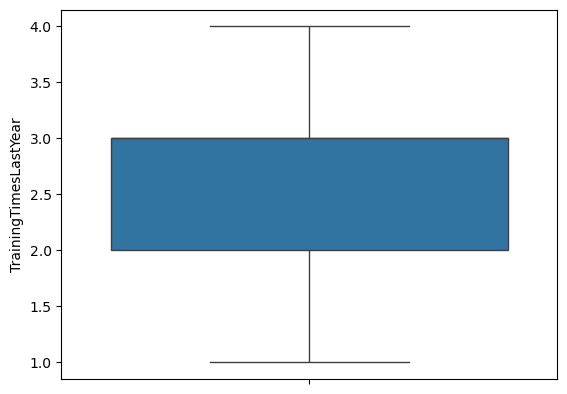

In [79]:
sns.boxplot(data["TrainingTimesLastYear"]) # check the otliers
plt.show()

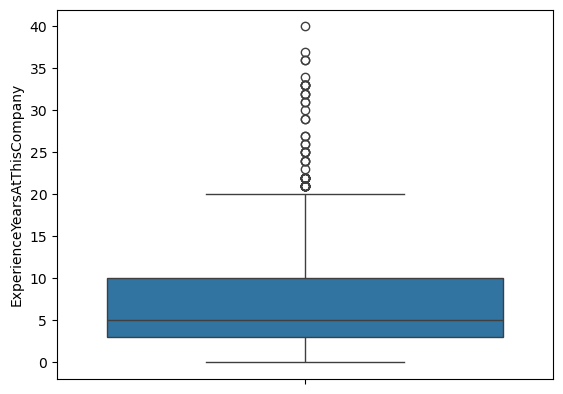

In [80]:
sns.boxplot(data["ExperienceYearsAtThisCompany"]) # check the otliers 
plt.show()

In [81]:
data.ExperienceYearsAtThisCompany.median() # find the median value of this column

5.0

In [82]:
data.loc[data["ExperienceYearsAtThisCompany"] >= 15,"ExperienceYearsAtThisCompany"] = 5.0 # handle the outliers using median value

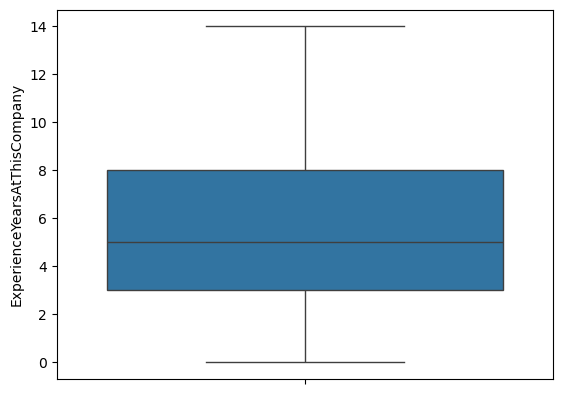

In [83]:
sns.boxplot(data["ExperienceYearsAtThisCompany"]) # check the otliers 
plt.show()

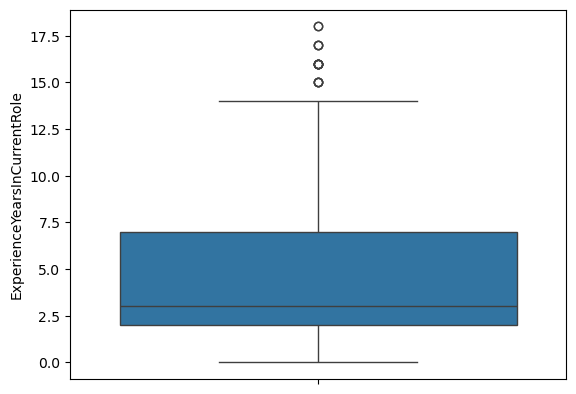

In [84]:
sns.boxplot(data["ExperienceYearsInCurrentRole"]) # check the otliers
plt.show()

In [85]:
data.ExperienceYearsInCurrentRole.median() # find the median value of this column

3.0

In [86]:
data.loc[data["ExperienceYearsInCurrentRole"] >= 15,"ExperienceYearsInCurrentRole"] = 3.0 # handle the outliers using median value

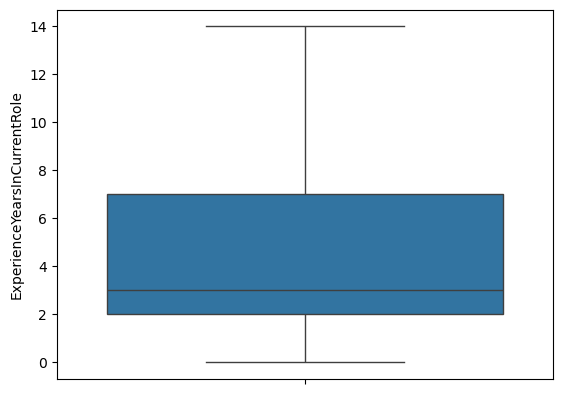

In [87]:
sns.boxplot(data["ExperienceYearsInCurrentRole"]) # check the otliers 
plt.show()

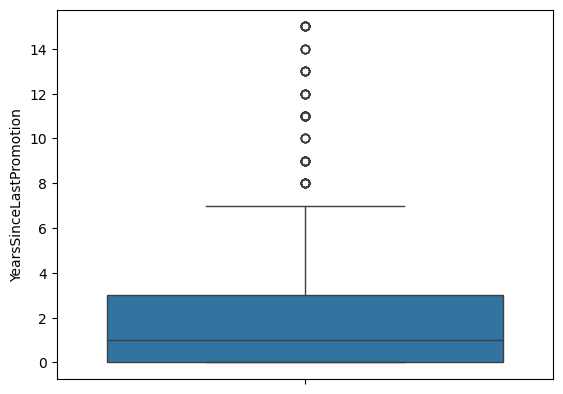

In [88]:
sns.boxplot(data["YearsSinceLastPromotion"]) # check the otliers 
plt.show()

In [89]:
data.YearsSinceLastPromotion.median() # find the median value of this column

1.0

In [90]:
data.loc[data["YearsSinceLastPromotion"] >= 3,"YearsSinceLastPromotion"] = 1.0 # handle the outliers using median value

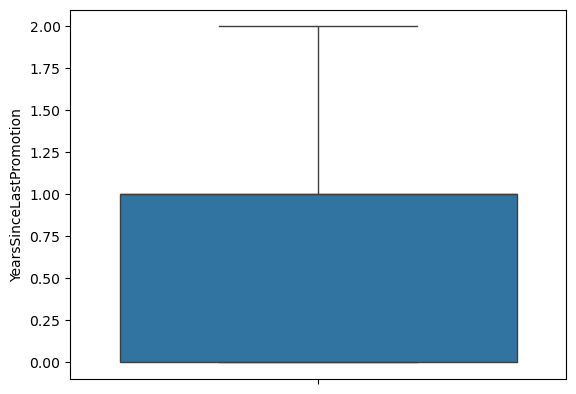

In [91]:
sns.boxplot(data["YearsSinceLastPromotion"]) # check the otliers 
plt.show()

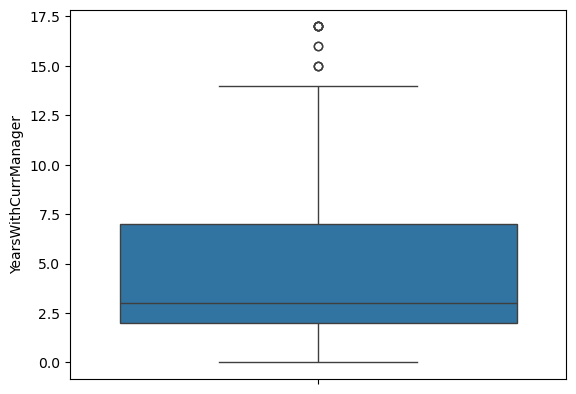

In [93]:
sns.boxplot(data["YearsWithCurrManager"]) # check the otliers 
plt.show()

In [94]:
data.YearsWithCurrManager.median() # find the median value of this column

3.0

In [95]:
data.loc[data["YearsWithCurrManager"] >= 15,"YearsWithCurrManager"] = 3.0 # handle the outliers using median value

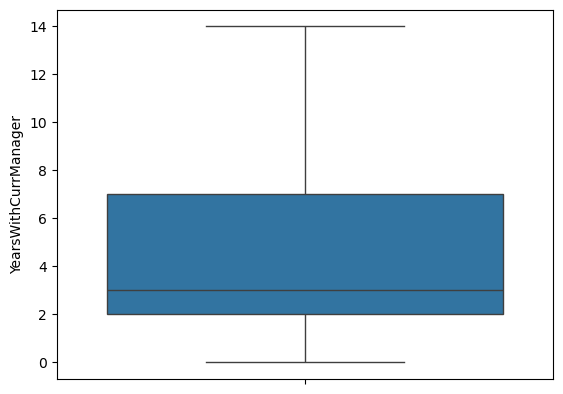

In [96]:
sns.boxplot(data["YearsWithCurrManager"]) # check the otliers 
plt.show()

In [97]:
data.head() # show the top 5 rows data

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   2   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          10                      2                   3   
2                          10                      2                   3   
3                          10                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                             5                            13   
3                             5                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                        1                     6        No                  3  
4                        2                     2        No                  3

In [98]:
# Loop through columns
for column in data.columns:
    # Get unique values
    a = data[column].unique()
    # Print info
    print("--------------")
    print(f"unique values in '{column}':")
    print(a)

--------------
unique values in 'EmpNumber':
['E1001000' 'E1001006' 'E1001007' ... 'E100994' 'E100995' 'E100998']
--------------
unique values in 'Age':
[32 47 40 41 60 27 50 28 36 38 44 30 29 42 34 39 56 53 35 52 33 25 45 23
 26 54 37 24 49 55 43 51 22 31 58 20 21 48 19 18 59 46 57]
--------------
unique values in 'Gender':
['Male' 'Female']
--------------
unique values in 'EducationBackground':
['Marketing' 'Life Sciences' 'Human Resources' 'Medical' 'Other'
 'Technical Degree']
--------------
unique values in 'MaritalStatus':
['Single' 'Married' 'Divorced']
--------------
unique values in 'EmpDepartment':
['Sales' 'Human Resources' 'Development' 'Data Science'
 'Research & Development' 'Finance']
--------------
unique values in 'EmpJobRole':
['Sales Executive' 'Manager' 'Developer' 'Sales Representative'
 'Human Resources' 'Senior Developer' 'Data Scientist'
 'Senior Manager R&D' 'Laboratory Technician' 'Manufacturing Director'
 'Research Scientist' 'Healthcare Representative' 'Rese

### Encoding Technique

* Encoding converts categorical data into numbers so machine learning models can use them.

**Label Encoding**: Assigns numbers to categories, good for ordered data.

**Ordinal Encoding**: Similar to label encoding, keeps category order.

**One-Hot Encoding**: Creates separate binary columns for each category, best for unordered data.

In [229]:
from sklearn.preprocessing import LabelEncoder  # Import LabelEncoder

# Initialize LabelEncoder
LE = LabelEncoder()

# Apply Label Encoding to categorical columns
data["EmpDepartment"] = LE.fit_transform(data["EmpDepartment"])               # Convert 'EmpDepartment' to numeric
data["EmpJobRole"] = LE.fit_transform(data["EmpJobRole"])                     # Convert 'EmpJobRole' to numeric
data["BusinessTravelFrequency"] = LE.fit_transform(data["BusinessTravelFrequency"])  # Convert travel frequency to numeric
data["OverTime"] = LE.fit_transform(data["OverTime"])                         # Convert 'OverTime' (Yes/No) to 1/0
data["Attrition"] = LE.fit_transform(data["Attrition"])                       # Convert 'Attrition' (Yes/No) to 1/0


In [231]:
data.head() # show the top 5 rows data

EmpNumber  Age  Gender EducationBackground MaritalStatus  EmpDepartment  \
0  E1001000   32       0           Marketing        Single              5   
1  E1001006   47       0           Marketing        Single              5   
2  E1001007   40       0       Life Sciences       Married              5   
3  E1001009   41       0     Human Resources      Divorced              3   
4  E1001010   60       0           Marketing        Single              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   2         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          10   
2                            3                          10   
3                            2                          10   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                             5   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

In [235]:
data["Gender"] = data["Gender"].replace({"Male":0,"Female":1}) # replace the value in Gender column

In [237]:
data.head() # show the top 5 rows data

EmpNumber  Age  Gender EducationBackground MaritalStatus  EmpDepartment  \
0  E1001000   32       0           Marketing        Single              5   
1  E1001006   47       0           Marketing        Single              5   
2  E1001007   40       0       Life Sciences       Married              5   
3  E1001009   41       0     Human Resources      Divorced              3   
4  E1001010   60       0           Marketing        Single              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   2         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          10   
2                            3                          10   
3                            2                          10   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                             5   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

In [239]:
OE = OneHotEncoder() # call Onehot encoding technique
df1 = pd.get_dummies(data["MaritalStatus"],dtype=int,prefix="MaritalStatus") # create the dumy variable of Marital status column

In [241]:
df1

MaritalStatus_Divorced  MaritalStatus_Married  MaritalStatus_Single
0                          0                      0                     1
1                          0                      0                     1
2                          0                      1                     0
3                          1                      0                     0
4                          0                      0                     1
...                      ...                    ...                   ...
1195                       1                      0                     0
1196                       0                      0                     1
1197                       0                      1                     0
1198                       0                      0                     1
1199                       0                      0                     1

[1200 rows x 3 columns]

In [243]:
data1 = pd.concat([data,df1],axis=1) # combanine the two data table
data1

EmpNumber  Age  Gender EducationBackground MaritalStatus  EmpDepartment  \
0     E1001000   32       0           Marketing        Single              5   
1     E1001006   47       0           Marketing        Single              5   
2     E1001007   40       0       Life Sciences       Married              5   
3     E1001009   41       0     Human Resources      Divorced              3   
4     E1001010   60       0           Marketing        Single              5   
...        ...  ...     ...                 ...           ...            ...   
1195   E100992   27       1             Medical      Divorced              5   
1196   E100993   37       0       Life Sciences        Single              1   
1197   E100994   50       0             Medical       Married              1   
1198   E100995   34       1             Medical        Single              0   
1199   E100998   24       1       Life Sciences        Single              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
0             13                        2                10   
1             13                        2                14   
2             13                        1                 5   
3              8                        2                10   
4             13                        2                16   
...          ...                      ...               ...   
1195          13                        1                 3   
1196          15                        2                10   
1197          15                        2                28   
1198           1                        2                 9   
1199          13                        2                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                     3                           4             55   
1                     4                           4             42   
2                     4                           4             48   
3                     4                           2             73   
4                     4                           1             84   
...                 ...                         ...            ...   
1195                  1                           4             71   
1196                  2                           4             80   
1197                  1                           4             74   
1198                  3                           4             46   
1199                  2                           1             65   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                     3            2                   4                   1   
1                     3            2                   1                   2   
2                     2            3                   1                   5   
3                     2            5                   4                   3   
4                     3            2                   1                   2   
...                 ...          ...                 ...                 ...   
1195                  4            2                   4                   1   
1196                  4            1                   4                   3   
1197                  4            1                   3                   1   
1198                  2            3                   2                   1   
1199                  3            2                   3                   2   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0            0                        12                            4   
1            0                        12                            4   
2            1                        21                            3   
3            0                        15                            2   
4            0                        14                            4   
...        ...                       ...       

In [245]:
from sklearn.preprocessing import OrdinalEncoder  # Import OrdinalEncoder

# Initialize the encoder
OE = OrdinalEncoder()

# Apply ordinal encoding to 'EducationBackground'
# This will convert the categories into ordered numeric values
data1["EducationBackground"] = OE.fit_transform(data1[["EducationBackground"]])


In [247]:
data1.head() # show the top 5 rows data

EmpNumber  Age  Gender  EducationBackground MaritalStatus  EmpDepartment  \
0  E1001000   32       0                  2.0        Single              5   
1  E1001006   47       0                  2.0        Single              5   
2  E1001007   40       0                  1.0       Married              5   
3  E1001009   41       0                  0.0      Divorced              3   
4  E1001010   60       0                  2.0        Single              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2                10                  3   
1          13                        2                14                  4   
2          13                        1                 5                  4   
3           8                        2                10                  4   
4          13                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   2         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          10   
2                            3                          10   
3                            2                          10   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                             5   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  MaritalStatus_Divorced  \
0                     8          0                  3                       0   
1                     7          0                  3                       0   
2                    12          0                  4                       0   
3                     6          0                  3                       1   
4                     2          0                  3                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      1                     0  
3                      0                     0  
4                      0                     1

In [249]:
data1.columns # check the dataset columns name

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [251]:
data1 = data1.drop(["EmpNumber","MaritalStatus"],axis=1) # drop the columns in this dataset

In [253]:
data1.head() # show the top 5 rows data

Age  Gender  EducationBackground  EmpDepartment  EmpJobRole  \
0   32       0                  2.0              5          13   
1   47       0                  2.0              5          13   
2   40       0                  1.0              5          13   
3   41       0                  0.0              3           8   
4   60       0                  2.0              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   2         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          10   
2                            3                          10   
3                            2                          10   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                             5   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  MaritalStatus_Divorced  \
0                     8          0                  3                       0   
1                     7          0                  3                       0   
2                    12          0                  4                       0   
3                     6          0                  3                       1   
4                     2          0                  3                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      1                     0  
3                      0                     0  
4                      0                     1

## 2. Feature Selection
>  Feature selection is the process of identifying and selecting the most relevant features for building machine learning models. The goal is to improve model performance by reducing overfitting, improving accuracy, and decreasing training time.


### HeatMap

> **Definition:**  
>  A heatmap uses color gradients to visualize the magnitude of values in a matrix format, especially useful for viewing correlations.

**Insights:**  
- **Correlation:** Shows strength and direction of relationships between features from -1 (strong negative correlation) to +1 (strong positive correlation).  
- **Color Coding:** Color scale indicates the intensity of correlations (darker shades for stronger correlations).  
- **Strong Relationships:** High correlations suggest closely related features, useful for feature selection.  
- **Multicollinearity:** Strong correlations between independent variables may indicate multicollinearity, affecting model performance.


In [735]:
# Select only numeric columns from the dataset
numerical_data = data1.select_dtypes(include=['float64', 'int64'])

# Generate and style the correlation matrix
numerical_data.corr().style.background_gradient(cmap='Blues')


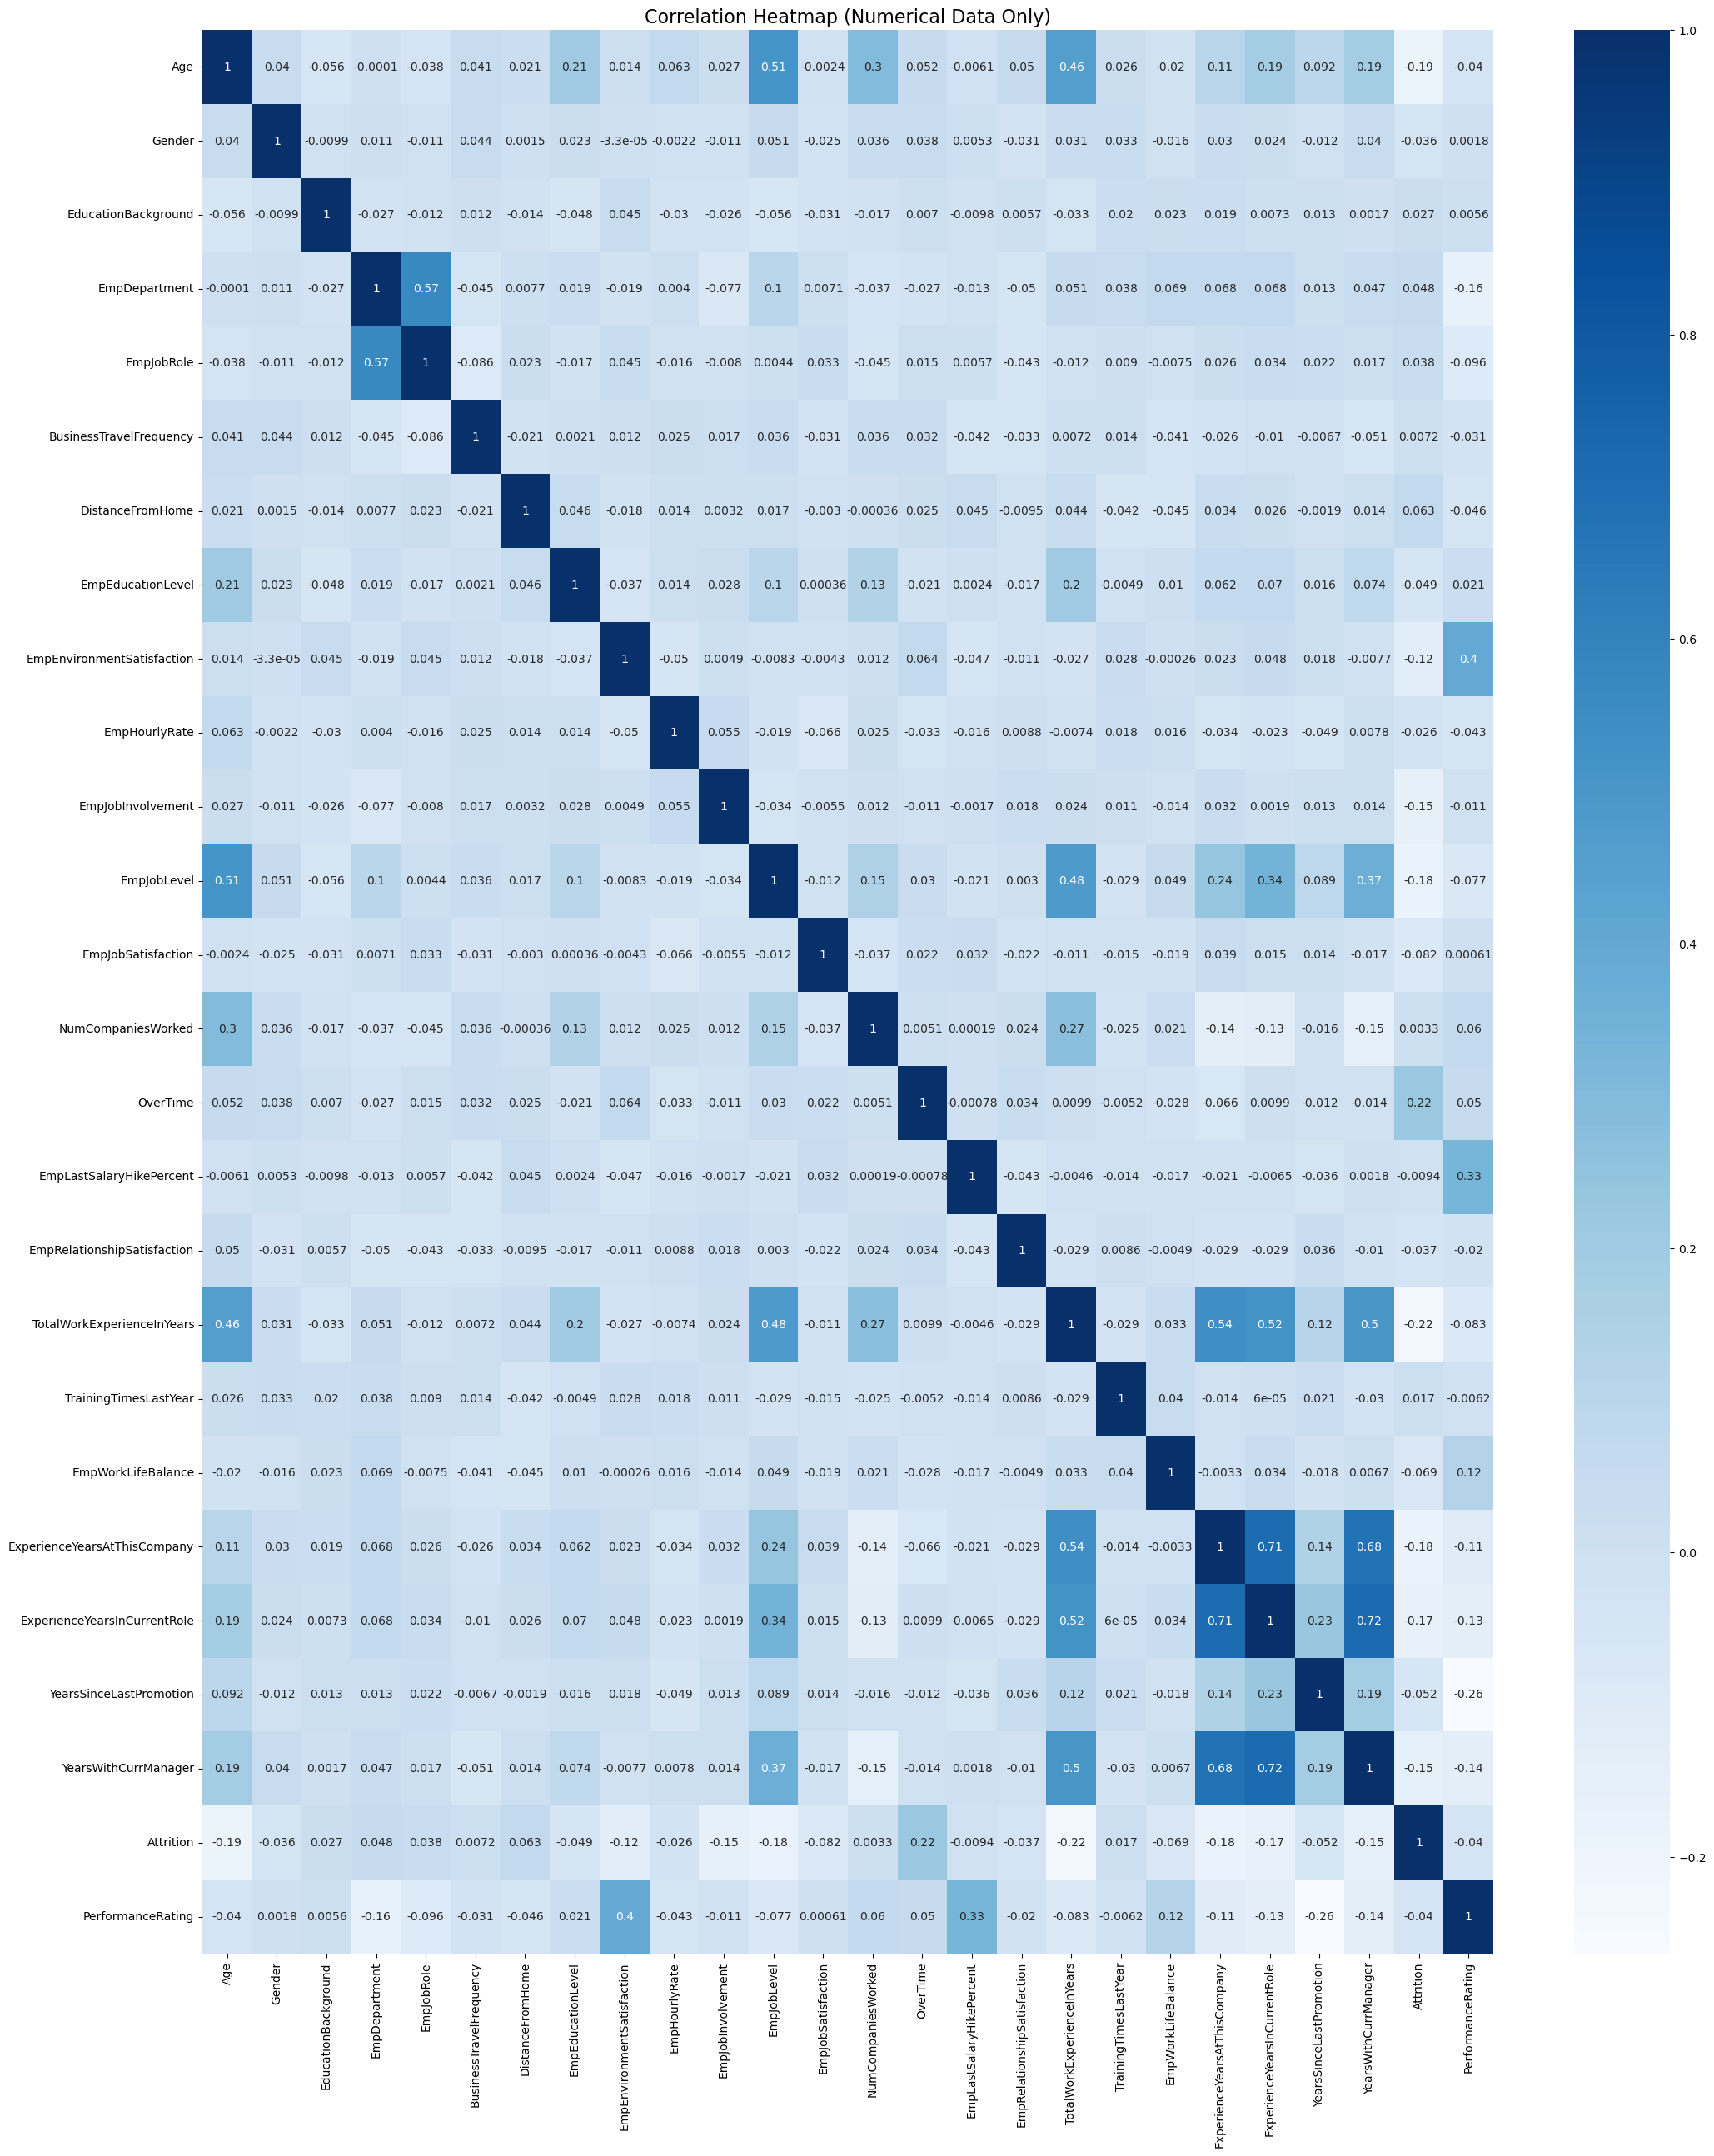

In [260]:
# Generate correlation matrix
correlation_matrix = numerical_data.corr()

# Create the heatmap
plt.figure(figsize=(25,30))
sns.heatmap(correlation_matrix, annot=True,cmap='Blues')
plt.title('Correlation Heatmap (Numerical Data Only)', fontsize=16)
plt.show()


In [261]:
# here change the value of target column
value_mapping = {2: 0, 3: 1, 4: 2}
data1["PerformanceRating"] = data1["PerformanceRating"].replace(value_mapping)

In [262]:
data1.head() # show the top 5 rows data

Age  Gender  EducationBackground  EmpDepartment  EmpJobRole  \
0   32       0                  2.0              5          13   
1   47       0                  2.0              5          13   
2   40       0                  1.0              5          13   
3   41       0                  0.0              3           8   
4   60       0                  2.0              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   2         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          10   
2                            3                          10   
3                            2                          10   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                             5   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                        1   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  MaritalStatus_Divorced  \
0                     8          0                  1                       0   
1                     7          0                  1                       0   
2                    12          0                  2                       0   
3                     6          0                  1                       1   
4                     2          0                  1                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      1                     0  
3                      0                     0  
4                      0                     1

<h1 style="text-align: center;"><strong>Model Selection</strong></h1>

>  **Definition:**
> Model selection is the process of choosing the most appropriate machine learning model for a given dataset, based on performance metrics and problem type.

### Splitting the Data into Features and Target

- **Definition**: Separating the input variables (features) and the output variable (target) for model training.
- **Featurex (X)**: Independent variables used to make predictions.
- **Target (y)**: Dependent variable being predicted.
- **Impact**: Ensures the model learns from the features to predict the target variable effectively.


In [268]:
# Create the independent variables (features)
x = data1.drop("PerformanceRating", axis=1)

# Create the dependent variable (target)
y = data1["PerformanceRating"]

# Check the shapes of x and y
print(x.shape)  # Features shape
print(y.shape)  # Target shape

(1200, 28)
(1200,)


In [270]:
x

Age  Gender  EducationBackground  EmpDepartment  EmpJobRole  \
0      32       0                  2.0              5          13   
1      47       0                  2.0              5          13   
2      40       0                  1.0              5          13   
3      41       0                  0.0              3           8   
4      60       0                  2.0              5          13   
...   ...     ...                  ...            ...         ...   
1195   27       1                  3.0              5          13   
1196   37       0                  1.0              1          15   
1197   50       0                  3.0              1          15   
1198   34       1                  3.0              0           1   
1199   24       1                  1.0              5          13   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                           2                10                  3   
1                           2                14                  4   
2                           1                 5                  4   
3                           2                10                  4   
4                           2                16                  4   
...                       ...               ...                ...   
1195                        1                 3                  1   
1196                        2                10                  2   
1197                        2                28                  1   
1198                        2                 9                  3   
1199                        2                 3                  2   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                              4             55                  3   
1                              4             42                  3   
2                              4             48                  2   
3                              2             73                  2   
4                              1             84                  3   
...                          ...            ...                ...   
1195                           4             71                  4   
1196                           4             80                  4   
1197                           4             74                  4   
1198                           4             46                  2   
1199                           1             65                  3   

      EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
0               2                   4                   1         0   
1               2                   1                   2         0   
2               3                   1                   5         1   
3               5                   4                   3         0   
4               2                   1                   2         0   
...           ...                 ...                 ...       ...   
1195            2                   4                   1         1   
1196            1                   4                   3         0   
1197            1                   3                   1         1   
1198            3                   2                   1         0   
1199            2                   3                   2         0   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                           12                            4   
1                           12                            4   
2                           21                            3   
3                           15                            2   
4                           14                            4   
...                        ...                          ...   
1195                        20                            2   
1196                        17                            1   
1197                        11                            3   
1198        

In [272]:
y

0       1
1       1
2       2
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    1
1199    0
Name: PerformanceRating, Length: 1200, dtype: int64

### Normalization/Scaling
> Normalization or scaling adjusts numeric features to a similar range or distribution, improving model performance.

1. **Min-Max Scaling**: Scales data to a fixed range (e.g., [0, 1]).    

2. **Standardization**: Centers data around 0 with a standard deviation of 1.

#### Why Scaling is Important:
> - For Algorithms Sensitive to Magnitude: Algorithms like K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Gradient Descent-based models are sensitive to the range of feature values. Scaling ensures that no feature dominates because of its magnitude.
> - Improves Convergence: For gradient-based algorithms, scaling speeds up convergence by making the optimization landscape smoother.
   

In [326]:
from sklearn.preprocessing import MinMaxScaler # import the scalling technique
ME = MinMaxScaler() # call the Minmax scalling technique
df2 = ME.fit_transform(x) # transform the data in certain range like 0 to 1
df2

array([[0.33333333, 0.        , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.69047619, 0.        , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.52380952, 0.        , 0.2       , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.76190476, 0.        , 0.6       , ..., 0.        , 1.        ,
        0.        ],
       [0.38095238, 1.        , 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.14285714, 1.        , 0.2       , ..., 0.        , 0.        ,
        1.        ]])

In [309]:
df2

Age  Gender  EducationBackground  EmpDepartment  EmpJobRole  \
0     0.333333     0.0                  0.4            1.0    0.722222   
1     0.690476     0.0                  0.4            1.0    0.722222   
2     0.523810     0.0                  0.2            1.0    0.722222   
3     0.547619     0.0                  0.0            0.6    0.444444   
4     1.000000     0.0                  0.4            1.0    0.722222   
...        ...     ...                  ...            ...         ...   
1195  0.214286     1.0                  0.6            1.0    0.722222   
1196  0.452381     0.0                  0.2            0.2    0.833333   
1197  0.761905     0.0                  0.6            0.2    0.833333   
1198  0.380952     1.0                  0.6            0.0    0.055556   
1199  0.142857     1.0                  0.2            1.0    0.722222   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                         1.0          0.321429               0.50   
1                         1.0          0.464286               0.75   
2                         0.5          0.142857               0.75   
3                         1.0          0.321429               0.75   
4                         1.0          0.535714               0.75   
...                       ...               ...                ...   
1195                      0.5          0.071429               0.00   
1196                      1.0          0.321429               0.25   
1197                      1.0          0.964286               0.00   
1198                      1.0          0.285714               0.50   
1199                      1.0          0.071429               0.25   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                       1.000000       0.357143           0.666667   
1                       1.000000       0.171429           0.666667   
2                       1.000000       0.257143           0.333333   
3                       0.333333       0.614286           0.333333   
4                       0.000000       0.771429           0.666667   
...                          ...            ...                ...   
1195                    1.000000       0.585714           1.000000   
1196                    1.000000       0.714286           1.000000   
1197                    1.000000       0.628571           1.000000   
1198                    1.000000       0.228571           0.333333   
1199                    0.000000       0.500000           0.666667   

      EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
0            0.25            1.000000            0.166667       0.0   
1            0.25            0.000000            0.333333       0.0   
2            0.50            0.000000            0.833333       1.0   
3            1.00            1.000000            0.500000       0.0   
4            0.25            0.000000            0.333333       0.0   
...           ...                 ...                 ...       ...   
1195         0.25            1.000000            0.166667       1.0   
1196         0.00            1.000000            0.500000       0.0   
1197         0.00            0.666667            0.166667       1.0   
1198         0.50            0.333333            0.166667       0.0   
1199         0.25            0.666667            0.333333       0.0   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                     0.071429                     1.000000   
1                     0.071429                     1.000000   
2                     0.714286                     0.666667   
3                     0.285714                     0.333333   
4                     0.214286                     1.000000   
...                        ...                          ...   
1195                  0.642857                     0.333333   
1196                  0.428571                     0.000000   
1197                

In [311]:
x.columns # check the independent columns name

Index(['Age', 'Gender', 'EducationBackground', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [328]:
# here scalling data convert the as dataframe form
x1 = pd.DataFrame(data = df2,columns=['Age', 'EducationBackground', 'EmpDepartment', 'EmpJobRole',
       'BusinessTravelFrequency', 'DistanceFromHome', 'EmpEducationLevel',
       'EmpEnvironmentSatisfaction', 'EmpHourlyRate', 'EmpJobInvolvement',
       'EmpJobLevel', 'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'Gender_Male',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'])
x1

Age  EducationBackground  EmpDepartment  EmpJobRole  \
0     0.333333                  0.0            0.4         1.0   
1     0.690476                  0.0            0.4         1.0   
2     0.523810                  0.0            0.2         1.0   
3     0.547619                  0.0            0.0         0.6   
4     1.000000                  0.0            0.4         1.0   
...        ...                  ...            ...         ...   
1195  0.214286                  1.0            0.6         1.0   
1196  0.452381                  0.0            0.2         0.2   
1197  0.761905                  0.0            0.6         0.2   
1198  0.380952                  1.0            0.6         0.0   
1199  0.142857                  1.0            0.2         1.0   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                    0.722222               1.0           0.321429   
1                    0.722222               1.0           0.464286   
2                    0.722222               0.5           0.142857   
3                    0.444444               1.0           0.321429   
4                    0.722222               1.0           0.535714   
...                       ...               ...                ...   
1195                 0.722222               0.5           0.071429   
1196                 0.833333               1.0           0.321429   
1197                 0.833333               1.0           0.964286   
1198                 0.055556               1.0           0.285714   
1199                 0.722222               1.0           0.071429   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
0                           0.50       1.000000           0.357143   
1                           0.75       1.000000           0.171429   
2                           0.75       1.000000           0.257143   
3                           0.75       0.333333           0.614286   
4                           0.75       0.000000           0.771429   
...                          ...            ...                ...   
1195                        0.00       1.000000           0.585714   
1196                        0.25       1.000000           0.714286   
1197                        0.00       1.000000           0.628571   
1198                        0.50       1.000000           0.228571   
1199                        0.25       0.000000           0.500000   

      EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
0        0.666667                0.25            1.000000  0.166667   
1        0.666667                0.25            0.000000  0.333333   
2        0.333333                0.50            0.000000  0.833333   
3        0.333333                1.00            1.000000  0.500000   
4        0.666667                0.25            0.000000  0.333333   
...           ...                 ...                 ...       ...   
1195     1.000000                0.25            1.000000  0.166667   
1196     1.000000                0.00            1.000000  0.500000   
1197     1.000000                0.00            0.666667  0.166667   
1198     0.333333                0.50            0.333333  0.166667   
1199     0.666667                0.25            0.666667  0.333333   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0                          0.0                     0.071429   
1                          0.0                     0.071429   
2                          1.0                     0.714286   
3                          0.0                     0.285714   
4                          0.0                     0.214286   
...                        ...                          ...   
1195                       1.0                     0.642857   
1196                       0.0                     0.428571   
1197                       1.0                     0.000000   
1198                       0.0                     0.

In [330]:
y1 = data1.PerformanceRating # create the new dependent variable
y1

0       1
1       1
2       2
3       1
4       1
       ..
1195    2
1196    1
1197    1
1198    1
1199    0
Name: PerformanceRating, Length: 1200, dtype: int64

In [332]:
y1.value_counts() # check the value counts

PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

### Train-Test Split:  
The train-test split divides data into two sets:  
- **Training Set**: Used to train the model (70-80% of the data).  
- **Testing Set**: Used to evaluate the model's performance (20-30% of the data).  

This helps prevent overfitting and allows evaluation of how well the model generalizes to unseen data. The common split ratio is 70/30 or 80/20.


In [335]:
from sklearn.model_selection import train_test_split  # Import train-test split method

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x1, y1,test_size=0.2,random_state=0)

# Verify split shapes
print(x_train.shape)  # Training features
print(x_test.shape)   # Testing features

(960, 28)
(240, 28)


In [337]:
x_train

Age  EducationBackground  EmpDepartment  EmpJobRole  \
867   0.952381                  1.0            0.6         0.2   
741   0.904762                  0.0            1.0         0.8   
467   0.285714                  0.0            0.2         1.0   
442   0.333333                  0.0            0.6         0.8   
610   0.500000                  0.0            0.2         1.0   
...        ...                  ...            ...         ...   
1033  0.309524                  0.0            0.4         1.0   
763   0.738095                  0.0            0.6         1.0   
835   0.119048                  0.0            1.0         1.0   
559   0.547619                  0.0            0.0         0.6   
684   0.404762                  0.0            0.6         1.0   

      BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
867                  0.166667               1.0           0.785714   
741                  0.388889               1.0           0.214286   
467                  0.722222               1.0           0.000000   
442                  0.444444               1.0           0.321429   
610                  0.722222               0.5           0.678571   
...                       ...               ...                ...   
1033                 0.722222               1.0           0.214286   
763                  0.722222               0.5           0.035714   
835                  0.777778               1.0           0.035714   
559                  0.333333               0.0           0.107143   
684                  0.722222               1.0           0.607143   

      EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
867                         0.75       1.000000           0.914286   
741                         0.25       1.000000           0.600000   
467                         0.50       0.333333           0.485714   
442                         0.50       0.666667           0.485714   
610                         0.50       0.666667           0.757143   
...                          ...            ...                ...   
1033                        0.50       1.000000           0.614286   
763                         0.50       1.000000           0.471429   
835                         0.00       0.666667           0.457143   
559                         0.50       0.666667           0.428571   
684                         0.75       0.333333           0.585714   

      EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  OverTime  \
867      0.666667                0.50            1.000000  0.166667   
741      0.666667                0.00            0.666667  0.333333   
467      0.333333                0.25            0.000000  0.166667   
442      0.666667                0.50            1.000000  0.333333   
610      0.666667                0.25            1.000000  0.333333   
...           ...                 ...                 ...       ...   
1033     0.666667                0.25            1.000000  0.666667   
763      0.333333                0.25            0.333333  0.333333   
835      0.666667                0.00            0.000000  0.500000   
559      0.000000                0.25            0.333333  1.000000   
684      0.666667                0.25            0.000000  0.000000   

      EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
867                        0.0                     0.071429   
741                        0.0                     0.000000   
467                        0.0                     0.000000   
442                        0.0                     1.000000   
610                        0.0                     0.500000   
...                        ...                          ...   
1033                       0.0                     0.071429   
763                        0.0                     0.214286   
835                        0.0                     0.142857   
559                        0.0                     0.

In [339]:
y_train

867     1
741     0
467     0
442     1
610     1
       ..
1033    1
763     1
835     1
559     1
684     0
Name: PerformanceRating, Length: 960, dtype: int64

### SMOTE: Synthetic Minority Oversampling Technique  

**Definition**:  
> SMOTE is an oversampling method used to address imbalanced datasets, where one class significantly outnumbers the other(s). It works by creating synthetic samples of the minority class rather than simply duplicating existing ones. This helps to balance the dataset and improve model performance, especially for the minority class.  


In [346]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for handling class imbalance

sm = SMOTE()  # Instantiate the SMOTE object

# Apply SMOTE to training data to balance the target classes
x_train_smote, y_train_smote = sm.fit_resample(x_train, y_train)


In [348]:
from collections import Counter  # Import Counter to check class distribution

print("Before SMOTE:", Counter(y_train))        # Class distribution before applying SMOTE
print("After SMOTE:", Counter(y_train_smote))   # Class distribution after applying SMOTE


Before SMOTE: Counter({1: 695, 0: 161, 2: 104})
After SMOTE: Counter({1: 695, 0: 695, 2: 695})


<h1 style="text-align: center;"><strong>Model Creation</strong></h1>


**Definition**:  
Model creation involves selecting a suitable machine learning algorithm, training it on the prepared data, and fine-tuning its parameters to achieve the best possible performance.  

**Steps in Model Creation**:  
1. **Select an Algorithm**: Choose an appropriate model (e.g., Logistic Regression, Decision Tree, Random Forest) based on the data and problem type (classification or regression).  
2. **Train the Model**: Use the training dataset to teach the model patterns in the data.  
3. **Evaluate the Model**: Test the model on the testing dataset to measure its accuracy, precision, recall, F1 score, or other metrics.  
4. **Optimize the Model**: Use techniques like hyperparameter tuning or cross-validation to enhance performance.  
5. **Save and Deploy**: Save the trained model for future predictions and deploy it in a real-world application.  


<h2 style="text-align: center;"><strong>Logistic Regression</strong></h2>

> **Definition**:  
Logistic Regression is a statistical method for analyzing a dataset in which there are one or more independent variables that determine an outcome. The outcome is typically binary (e.g., 0 or 1, yes or no). It uses the logistic function to model the probability of a certain class or event. c Regression Algorithm

In [406]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model with a fixed random state for reproducibility
lr = LogisticRegression(random_state=1)

# Train the Logistic Regression model using the scaled and resampled training data
lr.fit(x_train_smote, y_train_smote)

LogisticRegression(random_state=1)

In [408]:
# Make predictions on the test set
y_pred = lr.predict(x_test) 

In [410]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 2, 1, 2,
       1, 0, 2, 1, 1, 1, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 2,
       1, 2, 1, 0, 0, 1, 0, 1, 1, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0, 0, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 2, 2, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1,
       2, 1, 0, 1, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1, 1, 0, 2, 2, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 0, 1, 1, 1, 1, 1, 2, 1],
      dtype=int64)

In [412]:
y_test

198     1
328     1
45      1
263     1
621     1
       ..
1127    1
55      1
500     1
687     1
907     1
Name: PerformanceRating, Length: 240, dtype: int64

In [398]:
# import the all logistic regression algorithm mertics for model evaluation
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,precision_score,auc,recall_score,classification_report

In [400]:
# Generating the confusion matrix to evaluate the model's predictions
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 28,   4,   1],
       [ 24, 138,  17],
       [  1,   6,  21]], dtype=int64)

In [402]:
t1 = accuracy_score(y_test,y_pred) # check the model performance
t1

0.7791666666666667

In [414]:
y_trlr = lr.predict(x_train_smote) # predict the training data


In [416]:
a1 = accuracy_score(y_train_smote,y_trlr) # check the model performance
a1

0.8719424460431655

In [422]:
f1 = f1_score(y_test,y_pred,average="weighted") # check the model performnce for unbalanced data
f1

0.7921799154430537

In [426]:
r1 = recall_score(y_test,y_pred,average="weighted") # check the actual possitive predicted value by model performance
r1

0.7791666666666667

In [428]:
p1 = precision_score(y_test,y_pred,average="weighted") # check the predicted possitive value by model performance
p1

0.8309012114436644

In [430]:
print(classification_report(y_test,y_pred)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.53      0.85      0.65        33
           1       0.93      0.77      0.84       179
           2       0.54      0.75      0.63        28

    accuracy                           0.78       240
   macro avg       0.67      0.79      0.71       240
weighted avg       0.83      0.78      0.79       240



In [442]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize

# Binarize the true and predicted labels for multiclass AUC calculation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Calculate the macro-average ROC AUC score using One-vs-Rest approach
ra1 = roc_auc_score(
    y_test_bin,
    y_pred_bin,
    average='macro',
    multi_class='ovr'
)

print(ra1)


0.8333035892814116


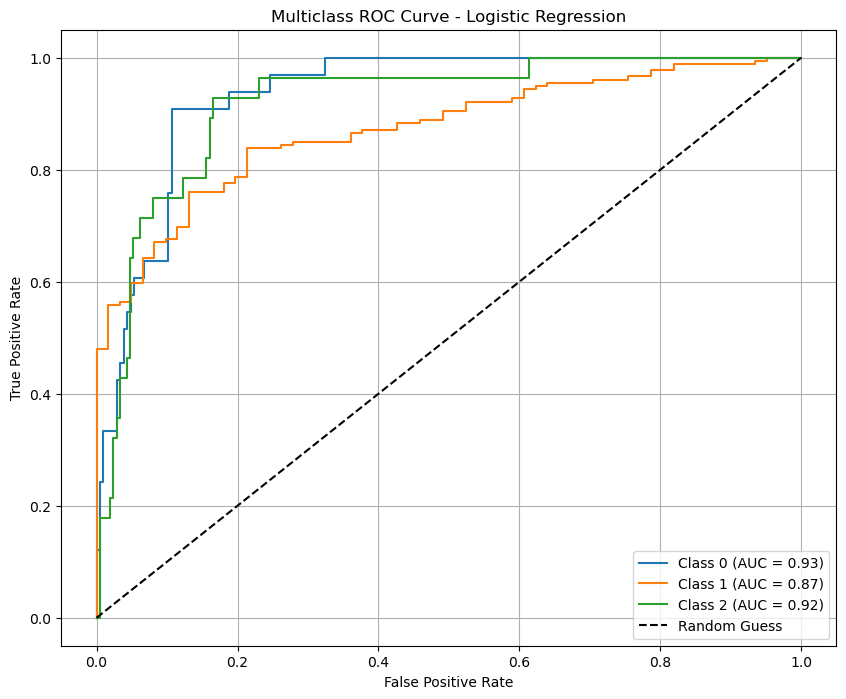

In [438]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize

# Step 1: Binarize the target for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Adjust classes if different
n_classes = y_test_bin.shape[1]  # Get number of unique classes

# Step 2: Initialize and train logistic regression model
lr = LogisticRegression(multi_class='ovr', solver='liblinear')
lr.fit(x_train_smote, y_train_smote)

# Step 3: Predict class probabilities
y_pred_prob = lr.predict_proba(x_test)  # Shape: [n_samples, n_classes]

# Step 4: Plot ROC for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    auc_score = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Diagonal line for random prediction
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Labels and plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()


<h2 style="text-align: center;"><strong>Support Vector Machine</strong></h2>

> **Definition:**
> - Support Vector Machine (SVM) is a supervised machine learning algorithm used for classification and regression tasks. It works by finding the optimal hyperplane that best separates different classes in the feature space.


In [447]:
from sklearn.svm import SVC

# Initialize the SVM model with class weights
svm_model = SVC(class_weight='balanced', random_state=1)

# Fit the model
svm_model.fit(x_train_smote, y_train_smote)

SVC(class_weight='balanced', random_state=1)

In [449]:
y_svm = SVM.predict(x_test) # predict the test data

In [451]:
t2 = accuracy_score(y_test,y_svm) # check the model performance
t2

0.8333333333333334

In [453]:
y_trsvm = SVM.predict(x_train_smote) # predict the training data

In [455]:
a2 = accuracy_score(y_train_smote,y_trsvm) # check the model performance
a2

0.9745803357314149

In [457]:
f2 = f1_score(y_test,y_svm,average="weighted") # check the actual possitive predicted value by model performance
f2

0.8320612761844107

In [459]:
r2 = recall_score(y_test,y_svm,average="weighted") # check the actual possitive predicted value by model performance
r2

0.8333333333333334

In [461]:
p2 = precision_score(y_test,y_svm,average="weighted") # check the predicted possitive value by model performance
p2

0.8313921957671958

In [465]:
confusion_matrix(y_test,y_svm) # check the true possitive and false possitive predicted value model performance to check model performance

array([[ 24,   8,   1],
       [  9, 161,   9],
       [  2,  11,  15]], dtype=int64)

In [467]:
print(classification_report(y_test,y_svm)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.69      0.73      0.71        33
           1       0.89      0.90      0.90       179
           2       0.60      0.54      0.57        28

    accuracy                           0.83       240
   macro avg       0.73      0.72      0.72       240
weighted avg       0.83      0.83      0.83       240



In [471]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_svm, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.7917738393323264


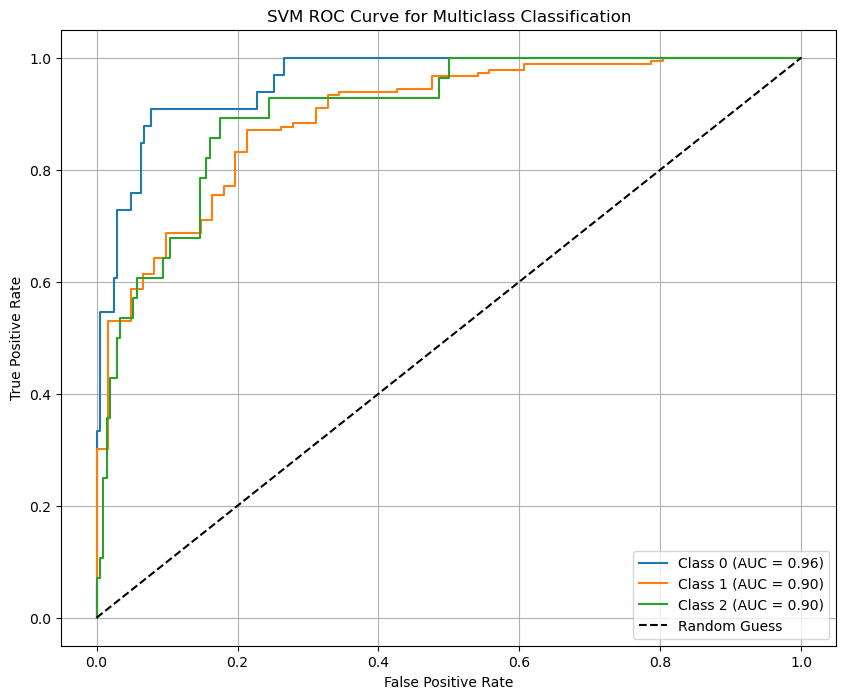

In [473]:
from sklearn.metrics import  roc_curve

# 1. Binarize the true test labels for multi-class ROC computation
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
n_classes = y_test_bin.shape[1]

# 2. Initialize SVM model (with probability=True to enable ROC curves)
svm1 = SVC(probability=True, decision_function_shape='ovr')

# 3. Train the SVM model on the SMOTE-augmented training data
svm1.fit(x_train_smote, y_train_smote)

# 4. Predict class probabilities for the test set
a22 = svm1.predict_proba(x_test)

# 5. Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a22[:, i])  # ROC points
    auc_score = roc_auc_score(y_test_bin[:, i], a22[:, i])  # AUC for class i
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')  # Plot line

# 6. Plot reference line for random guess
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# 7. Final plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


<h2 style="text-align: center;"><strong>Decision Tree Algorithm</strong></h2>

> **Definition:**
> A Decision Tree is a supervised machine learning algorithm that divides a dataset into subsets using a tree-like model of decisions. Each internal node of the tree represents a decision based on a feature, and each leaf node represents an outcome (class label or continuous value).

#### Key Features:
1. **Easy to Understand**: Decision trees are simple to visualize and interpret.
2. **Non-linear Model**: They can handle non-linear data patterns.
3. **Handles Both Numerical and Categorical Data**: Unlike some algorithms, decision trees can handle both types of data.


In [476]:
from sklearn.tree import DecisionTreeClassifier # import the decision tree algortihm
DT = DecisionTreeClassifier(criterion = "entropy",min_samples_split=0.1) # call the desicion tree algorithm
DT.fit(x_train_smote,y_train_smote) # train the model

DecisionTreeClassifier(criterion='entropy', min_samples_split=0.1)

In [478]:
y_dt = DT.predict(x_test) # predict the test data

In [480]:
t3 = accuracy_score(y_test,y_dt) # check the model performance
t3

0.8708333333333333

In [482]:
y_trdt = DT.predict(x_train_smote) # predict the training data

In [484]:
a3 = accuracy_score(y_train_smote,y_trdt) # check the model performance
a3

0.9223021582733812

In [486]:
f3 = f1_score(y_test,y_dt,average="weighted") # check the actual possitive predicted value by model performance
f3

0.8796050727543439

In [488]:
r3 = recall_score(y_test,y_dt,average="weighted") # check the actual possitive predicted value by model performance
r3

0.8708333333333333

In [490]:
p3 = precision_score(y_test,y_dt,average="weighted") # check the predicted possitive value by model performance
p3

0.9040395875374548

In [492]:
print(classification_report(y_test,y_dt)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.97      0.85      0.91       179
           2       0.54      0.89      0.68        28

    accuracy                           0.87       240
   macro avg       0.79      0.90      0.83       240
weighted avg       0.90      0.87      0.88       240



In [494]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_dt, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.913636879890453


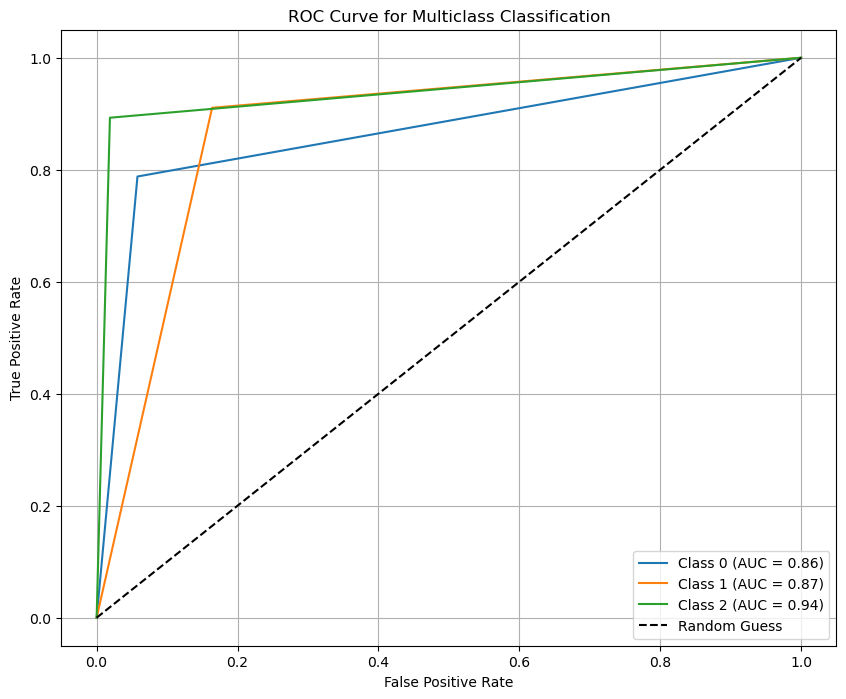

In [496]:
from sklearn.metrics import  roc_curve

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the Decision Tree Classifier
dt1 = DecisionTreeClassifier()

# Train the model
dt1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a23 = dt1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a23[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a23[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()


<h2 style="text-align: center;"><strong>Bagging</strong></h2>

> **Definition:**
> Bagging (Bootstrap Aggregating) is an ensemble technique that improves model accuracy by combining predictions from multiple models trained on random subsets of the data. Each model is trained on a different bootstrapped sample (with replacement), and the final prediction is made by averaging (for regression) or voting (for classification). It helps reduce variance and avoids overfitting.

In [517]:
from sklearn.ensemble import BaggingClassifier # import the Bagging Algorithm
BG = BaggingClassifier(max_samples = 0.5,random_state=0) # call the Bagging algorithm
BG.fit(x_train_smote,y_train_smote) # train the mdoel

BaggingClassifier(max_samples=0.5, random_state=0)

In [519]:
y_bg = BG.predict(x_test) # predict the test data

In [521]:
t5 = accuracy_score(y_test,y_bg) # check the model performance
t5

0.9375

In [523]:
y_trbg = BG.predict(x_train_smote) # predict the training data

In [525]:
a5 = accuracy_score(y_train_smote,y_trbg) # check the model performance
a5

0.9817745803357314

In [527]:
f5 = f1_score(y_test,y_bg,average="weighted") # check the actual possitive predicted value by model performance
f5

0.938738952020202

In [529]:
r5 = recall_score(y_test,y_bg,average="weighted") # check the actual possitive predicted value by model performance
r5

0.9375

In [531]:
p5 = precision_score(y_test,y_bg,average="weighted") # check the predicted possitive value by model performance
p5

0.9420501704461243

In [533]:
print(classification_report(y_test,y_bg)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.98      0.94      0.96       179
           2       0.89      0.89      0.89        28

    accuracy                           0.94       240
   macro avg       0.89      0.93      0.90       240
weighted avg       0.94      0.94      0.94       240



In [535]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_bg, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.943002183930029


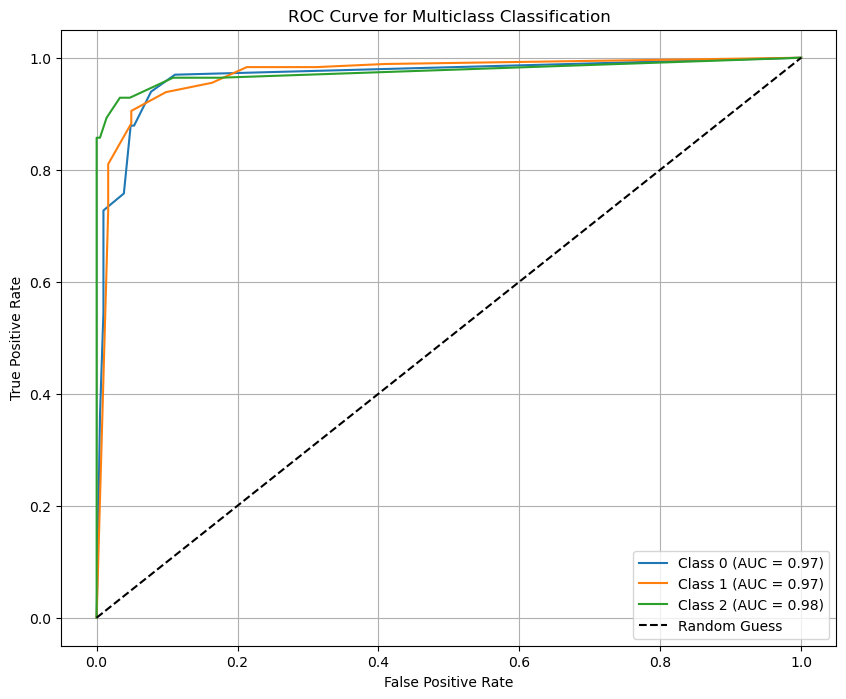

In [537]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the Bagging Classifier
base_estimator1 = DecisionTreeClassifier()  # Use Decision Tree as the base estimator
bagging1 = BaggingClassifier(n_estimators=10, random_state=42)

# Train the model
bagging1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a25 = bagging1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a25[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a25[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h2 style="text-align: center;"><strong>Random Forest</strong></h2>

> **Definition:**
>  Random Forest is an ensemble learning method based on bagging. It builds multiple decision trees on random subsets of the data and features, and combines their outputs using majority voting (for classification) or averaging (for regression). This reduces overfitting, increases accuracy, and handles missing values or noisy data better than a single decision tree.

In [542]:
from sklearn.ensemble import RandomForestClassifier # import the random forest algorithm
RM = RandomForestClassifier(min_samples_split=0.01,random_state=0) # call the random forest algorithm
RM.fit(x_train_smote,y_train_smote) # train the model

RandomForestClassifier(min_samples_split=0.01, random_state=0)

In [544]:
y_rm = RM.predict(x_test) # predict the test data

In [546]:
t6 = accuracy_score(y_test,y_rm) # check the model performance
t6

0.9416666666666667

In [548]:
y_trrm = RM.predict(x_train_smote) # predict the training data

In [552]:
a6 = accuracy_score(y_train_smote,y_trrm) # check the model performance
a6

0.981294964028777

In [554]:
f6 = f1_score(y_test,y_rm,average="weighted") # check the actual possitive predicted value by model performance
f6

0.9416175409557763

In [556]:
r6 = recall_score(y_test,y_rm,average="weighted") # check the actual possitive predicted value by model performance
r6

0.9416666666666667

In [558]:
p6 = precision_score(y_test,y_rm,average="weighted") # check the predicted possitive value by model performance
p6

0.9418613142302281

In [560]:
print(classification_report(y_test,y_rm)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.89      0.94      0.91        33
           1       0.97      0.96      0.96       179
           2       0.85      0.82      0.84        28

    accuracy                           0.94       240
   macro avg       0.90      0.91      0.90       240
weighted avg       0.94      0.94      0.94       240



In [564]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_rm, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.930860685634587


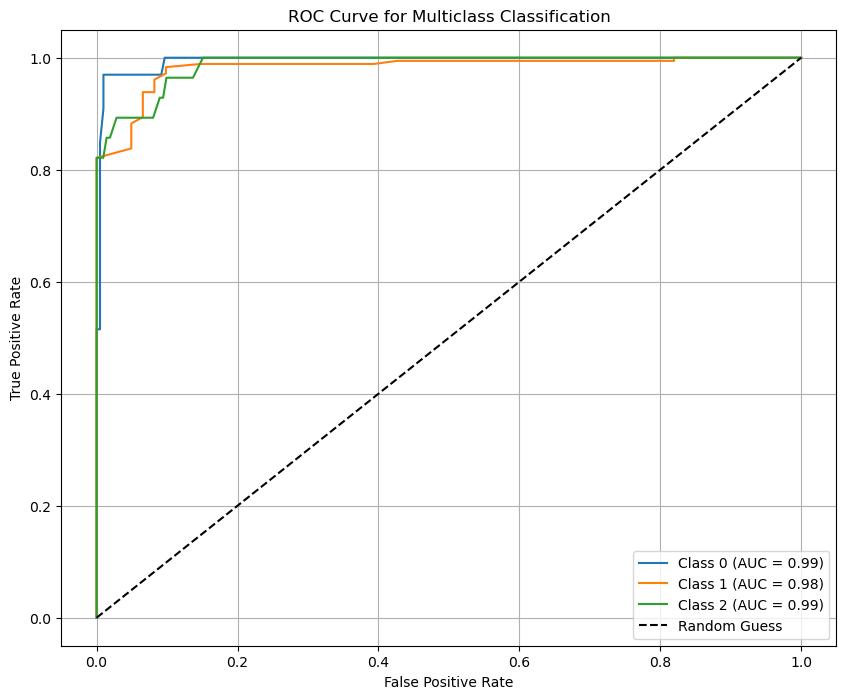

In [566]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the Random Forest Classifier
rf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a26 = rf1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a26[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a26[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h2 style="text-align: center;"><strong>Gradient Boosting</strong></h2>

> **Definition:**
> Gradient Boosting is an ensemble learning technique that builds models sequentially, where each new model tries to correct the errors made by the previous one. It combines multiple weak learners (usually decision trees) to create a strong predictive model. It uses gradient descent to minimize the loss, making it powerful for both classification and regression tasks.

In [569]:
from sklearn.ensemble import GradientBoostingClassifier # import the Gradinat boosting algorithm
GB = GradientBoostingClassifier(min_samples_split=0.1,random_state=0,min_samples_leaf=4,max_depth=3) # call the gradiant boosting algorithm
GB.fit(x_train_smote,y_train_smote) # train the model

GradientBoostingClassifier(min_samples_leaf=4, min_samples_split=0.1,
                           random_state=0)

In [575]:
y_gb = GB.predict(x_test) # predict the test data

In [577]:
t7 = accuracy_score(y_test,y_gb) # check the model performance
t7

0.9375

In [579]:
y_trgb = GB.predict(x_train_smote) # predict the training data

In [581]:
a7 = accuracy_score(y_train_smote,y_trbg) # check the model performance
a7

0.9817745803357314

In [583]:
f7 = f1_score(y_test,y_gb,average="weighted") # check the actual possitive predicted value by model performance
f7

0.9385444561715749

In [585]:
r7 = recall_score(y_test,y_gb,average="weighted") # check the actual possitive predicted value by model performance
r7

0.9375

In [587]:
p7 = precision_score(y_test,y_gb,average="weighted") # check the predicted possitive value by model performance
p7

0.9414933125173185

In [589]:
print(classification_report(y_test,y_bg)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        33
           1       0.98      0.94      0.96       179
           2       0.89      0.89      0.89        28

    accuracy                           0.94       240
   macro avg       0.89      0.93      0.90       240
weighted avg       0.94      0.94      0.94       240



In [591]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_gb, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.9471785586552325


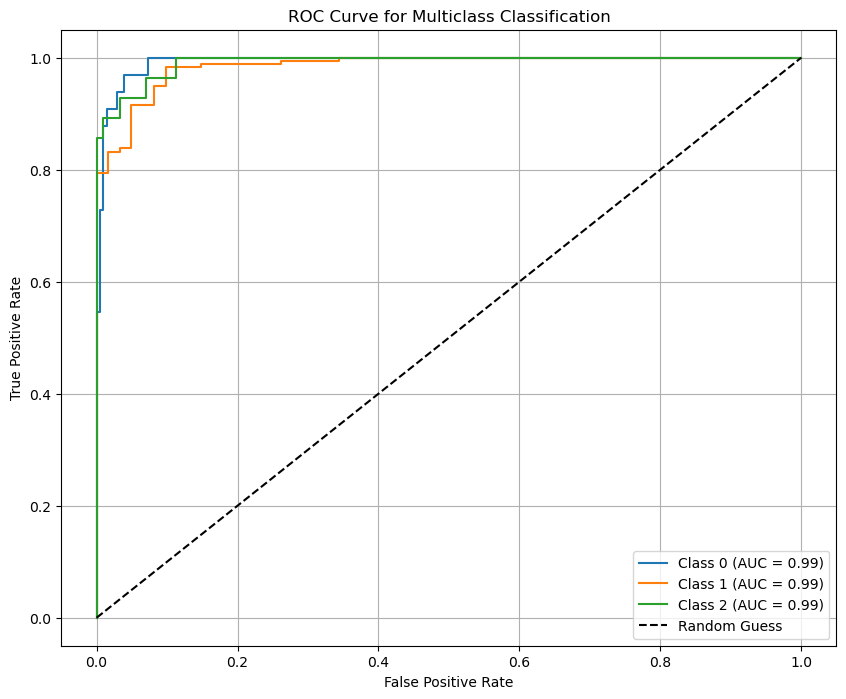

In [593]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the Gradient Boosting Classifier
gbc1 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
gbc1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a27 = gbc1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a27[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a27[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h2 style="text-align: center;"><strong>XGBoost (Extreme Gradient Boosting)</strong></h2>

> **Definition:**
> XGBoost (Extreme Gradient Boosting) is an advanced and optimized version of gradient boosting. It is Faster due to parallel processing also 
Regularized to reduce overfitting and Handles missing values automatically. Often gives high accuracy in structured/tabular datasets

In [597]:
from xgboost import XGBClassifier # import the XGBoost algorithm
XGB = XGBClassifier(max_depth=4,n_estimators = 20) # call the XGBoost algorihtm
XGB.fit(x_train_smote,y_train_smote) # train the model

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=20, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [598]:
y_xgb = XGB.predict(x_test) # predict the test data

In [599]:
t8 = accuracy_score(y_test,y_xgb) # check the model performance
t8

0.95

In [605]:
y_trxgb = XGB.predict(x_train_smote) # predict the training data

In [607]:
a8 = accuracy_score(y_train_smote,y_trxgb) # check the model performance
a8

0.988968824940048

In [609]:
f8 = f1_score(y_test,y_xgb,average="weighted") # check the actual possitive predicted value by model performance
f8

0.9500444353295051

In [611]:
r8 = recall_score(y_test,y_xgb,average="weighted") # check the actual possitive predicted value by model performance
r8

0.95

In [613]:
p8 = precision_score(y_test,y_xgb,average="weighted") # check the predicted possitive value by model performance
p8

0.9512361111111111

In [615]:
print(classification_report(y_test,y_xgb)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        33
           1       0.97      0.97      0.97       179
           2       0.96      0.86      0.91        28

    accuracy                           0.95       240
   macro avg       0.93      0.92      0.92       240
weighted avg       0.95      0.95      0.95       240



In [617]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_xgb, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.9392975028704016


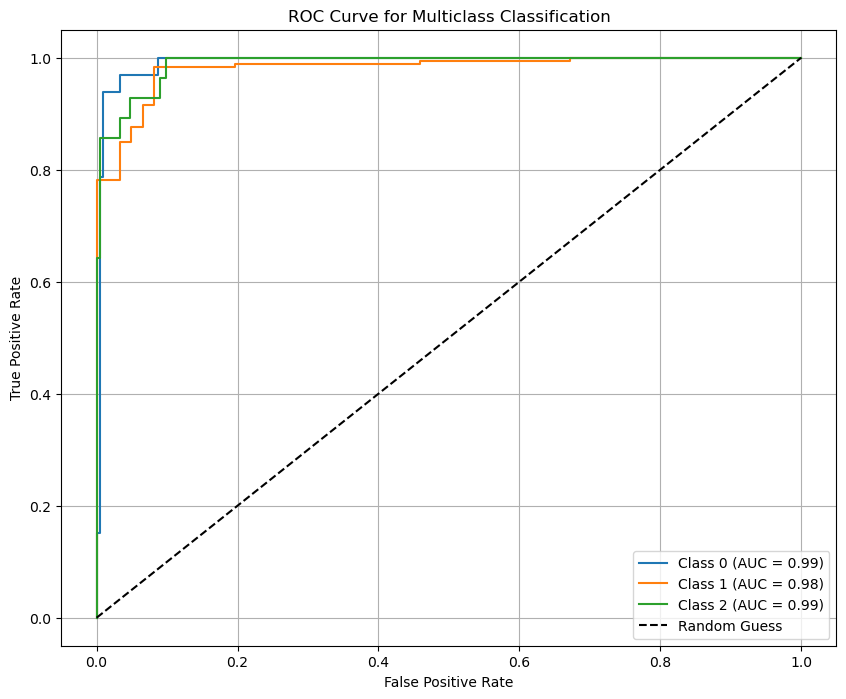

In [619]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the XGBoost Classifier
xgb1 = XGBClassifier(objective='multi:softprob', n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Train the model
xgb1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a28 = xgb1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a28[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a28[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h2 style="text-align: center;"><strong>AdaBoost (Adaptive Boosting)</strong></h2>

> **Definition:**
> AdaBoost (Adaptive Boosting) is a machine learning technique that combines several simple models (called weak learners) to create a stronger overall model. It works by giving more importance to the data points that were predicted incorrectly in previous rounds, so the next model focuses more on those mistakes. This helps improve accuracy and makes the final model better at making correct predictions. 

In [3]:
from sklearn.ensemble import AdaBoostClassifier # import the Adaboosting algorithm
AD = AdaBoostClassifier(learning_rate=0.4,n_estimators=50) # call the Adaboosting algorithm
AD.fit(x_train_smote,y_train_smote) # train the model

NameError: name 'x_train_smote' is not defined

In [ ]:
y_ad = AD.predict(X_test) # predict the test data

In [633]:
t10 = accuracy_score(y_test,y_ad) # check the model performance
t10

0.8791666666666667

In [635]:
y_trad = AD.predict(x_train_smote) # predict the training data

In [637]:
a10 = accuracy_score(y_train_smote,y_trad) # check the model performance
a10

0.9103117505995204

In [639]:
f10 = f1_score(y_test,y_ad,average="weighted") # check the actual possitive predicted value by model performance
f10

0.8823868843897354

In [641]:
r10 = recall_score(y_test,y_ad,average="weighted") # check the actual possitive predicted value by model performance
r10

0.8791666666666667

In [643]:
p10 = precision_score(y_test,y_ad,average="weighted") # check the predicted possitive value by model performance
p10

0.8914490556460877

In [645]:
print(classification_report(y_test,y_ad)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.78      0.97      0.86        33
           1       0.95      0.88      0.92       179
           2       0.64      0.75      0.69        28

    accuracy                           0.88       240
   macro avg       0.79      0.87      0.82       240
weighted avg       0.89      0.88      0.88       240



In [647]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_ad, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.895191493084117


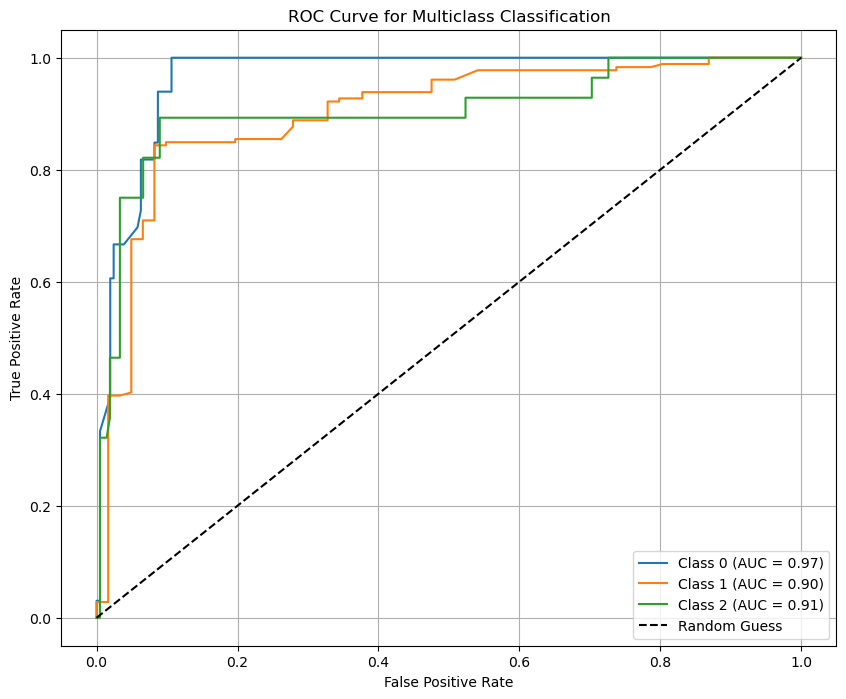

In [649]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the AdaBoost Classifier with a Decision Tree as the base estimator
adaboost1 = AdaBoostClassifier(
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)

# Train the model
adaboost1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a30 = adaboost1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a30[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a30[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

<h2 style="text-align: center;"><strong>Artificial Neural Networks(Ann)</strong></h2>

>**Definition**
> Artificial Neural Network (ANN) is a machine learning model inspired by how the human brain works. It consists of layers of interconnected nodes (neurons) that process data and learn patterns. ANN can handle complex problems like image recognition and prediction by adjusting the connections (weights) during training to make accurate decisions.

In [652]:
from sklearn.neural_network import MLPClassifier #import ANN algorithm
ANN = MLPClassifier(warm_start=True,hidden_layer_sizes=200) # call the ANN algorithm
ANN.fit(x_train_smote,y_train_smote) # train the model

MLPClassifier(hidden_layer_sizes=200, warm_start=True)

In [653]:
y_ann = ANN.predict(x_test) # predict the test data

In [654]:
t11 = accuracy_score(y_test,y_ann) # check the model performance
t11

0.8375

In [658]:
y_trann = ANN.predict(x_train_smote) # predict the training data

In [660]:
a11 = accuracy_score(y_train_smote,y_trann) # check the model performance
a11

0.992326139088729

In [662]:
f11 = f1_score(y_test,y_ann,average="weighted") # check the actual possitive predicted value by model performance
f11

0.8379840570907987

In [664]:
r11 = recall_score(y_test,y_ann,average="weighted") # check the actual possitive predicted value by model performance
r11

0.8375

In [666]:
p11 = precision_score(y_test,y_ann,average="weighted") # check the predicted possitive value by model performance
p11

0.8428895716152848

In [668]:
print(classification_report(y_test,y_ann)) # check the model performace report 

              precision    recall  f1-score   support

           0       0.61      0.76      0.68        33
           1       0.90      0.89      0.90       179
           2       0.73      0.57      0.64        28

    accuracy                           0.84       240
   macro avg       0.75      0.74      0.74       240
weighted avg       0.84      0.84      0.84       240



### Hyperparamter off ANN Algorithm

In [672]:
from sklearn.neural_network import MLPClassifier # import the ANN algorithm
from sklearn.model_selection import GridSearchCV # import the hyperparamter tuning technique

model = MLPClassifier() # call the ANN algorithm

param_grid = {
    'hidden_layer_sizes': [32,64,80,120],  # Tuple for number of neurons
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],  # Regularization parameter
    'batch_size': [16, 32],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [100, 200]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1) # call the gridsearch cv hyperparameter tuning technique
grid.fit(x_train_smote, y_train_smote) # train the hyperparamter mdoel

print("Best Parameters:", grid.best_params_) # check the best parameters of hyperparamter model
print("Best Score:", grid.best_score_) # check the best score of hyperparamter model

Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best Parameters: {'activation': 'relu', 'alpha': 0.001, 'batch_size': 16, 'hidden_layer_sizes': 80, 'learning_rate': 'adaptive', 'max_iter': 200, 'solver': 'adam'}
Best Score: 0.9529976019184652


In [691]:
y_hyann = grid.predict(x_test) # predict the test data

In [693]:
t12 = accuracy_score(y_test,y_hyann) # check the model performance
t12

0.8291666666666667

In [695]:
y_trhyann = grid.predict(x_train_smote) # predict the training data

In [697]:
a12 = accuracy_score(y_train_smote,y_trhyann) # check the model performance
a12

1.0

In [699]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
# Convert true and predicted labels to binary format for each class
ra1 = roc_auc_score(
    label_binarize(y_test, classes=[0, 1, 2]),  # True labels binarized
    label_binarize(y_ann, classes=[0, 1, 2]),  # Predicted labels binarized
    average='macro',  # Average ROC AUC over all classes equally
    multi_class='ovr'  # One-vs-Rest strategy for multiclass
)
print(ra1)  # Print the ROC AUC score

0.8064289967057876


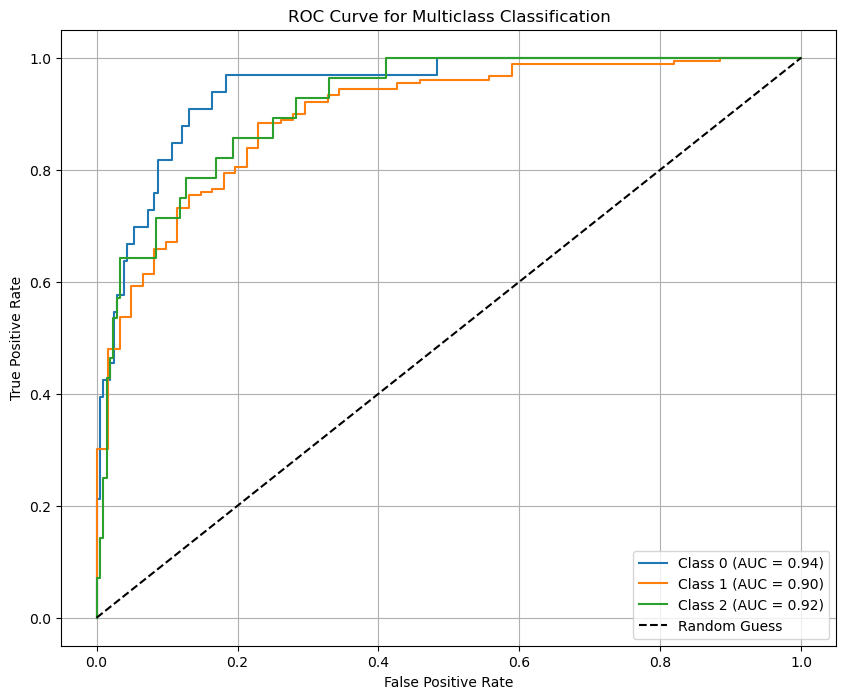

In [701]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarize the labels for multiclass ROC
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Replace with your classes
n_classes = y_test_bin.shape[1]

# Initialize the MLPClassifier (ANN)
mlp1 = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=200, random_state=42)

# Train the model
mlp1.fit(x_train_smote, y_train_smote)

# Get predicted probabilities
a31 = mlp1.predict_proba(x_test)  # Predicted probabilities (2D array)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))
for i in range(n_classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], a31[:, i])  # Use probabilities for class `i`
    auc_score = roc_auc_score(y_test_bin[:, i], a31[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {auc_score:.2f})')

# Plot diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot settings
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiclass Classification')
plt.legend(loc='lower right')
plt.grid()
plt.show()

### Cross Validation Technique

* Cross-validation is a statistical technique used to assess the performance of a machine learning model and ensure that it generalizes well to unseen data. 

In [705]:
from sklearn.model_selection import cross_val_score
score4 = cross_val_score(ANN,x,y,cv = 7,scoring="accuracy")
print(score4)
print(np.mean(score4))

[0.77906977 0.89534884 0.79069767 0.83625731 0.79532164 0.80701754
 0.78947368]
0.8133123506440519


<h2 style="text-align: center;"><strong>Model Comparision Report</strong></h2>


In [708]:
# check the all algorithm model perforamnce in table form
# check the Model name, r2_score, mean_squer_error, mean_absolute_error
score = pd.DataFrame({"Model":["LogisticRegression","SVM Algorithm","DecisionTreeClassifier","Bagging Algorithm","RandomForestClassifier","GradiantBoosting Algorithm","XGBClassifirer Algorithm","AdaBoosting Algorithm","ANN_MLPClassifer Algorithm"],
                     "Accuracy_Score":[t1*100,t2*100,t3*100,t5*100,t6*100,t7*100,t8*100,t10*100,t12*100],
                      "Training_Accuracy_Score":[a1*100,a2*100,a3*100,a5*100,a6*100,a7*100,a8*100,a10*100,a12*100],
                     "F1_Score":[f1*100,f2*100,f3*100,f5*100,f6*100,f7*100,f8*100,f10*100,f11*100],
                     "Recall_Score":[r1*100,r2*100,r3*100,r5*100,r6*100,r7*100,r8*100,r10*100,r11*100],
                     "Precision_Score":[p1*100,p2*100,p3*100,p5*100,p6*100,p7*100,p8*100,p10*100,p11*100]})
score

Model  Accuracy_Score  Training_Accuracy_Score  \
0          LogisticRegression       77.916667                87.194245   
1               SVM Algorithm       83.333333                97.458034   
2      DecisionTreeClassifier       87.083333                92.230216   
3           Bagging Algorithm       93.750000                98.177458   
4      RandomForestClassifier       94.166667                98.129496   
5  GradiantBoosting Algorithm       93.750000                98.177458   
6    XGBClassifirer Algorithm       95.000000                98.896882   
7       AdaBoosting Algorithm       87.916667                91.031175   
8  ANN_MLPClassifer Algorithm       82.916667               100.000000   

    F1_Score  Recall_Score  Precision_Score  
0  79.217992     77.916667        83.090121  
1  83.206128     83.333333        83.139220  
2  87.960507     87.083333        90.403959  
3  93.873895     93.750000        94.205017  
4  94.161754     94.166667        94.186131  
5  93.854446     93.750000        94.149331  
6  95.004444     95.000000        95.123611  
7  88.238688     87.916667        89.144906  
8  83.798406     83.750000        84.288957

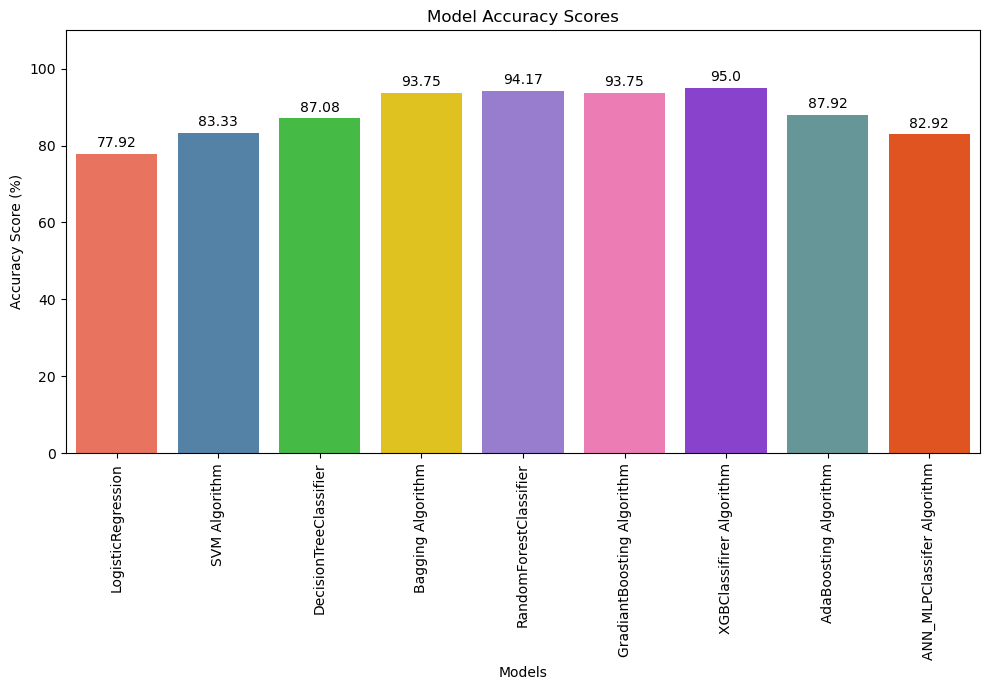

In [712]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500', '#D2691E', '#1E90FF']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 7))
bars = sns.barplot(x='Model', y='Accuracy_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Model Accuracy Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

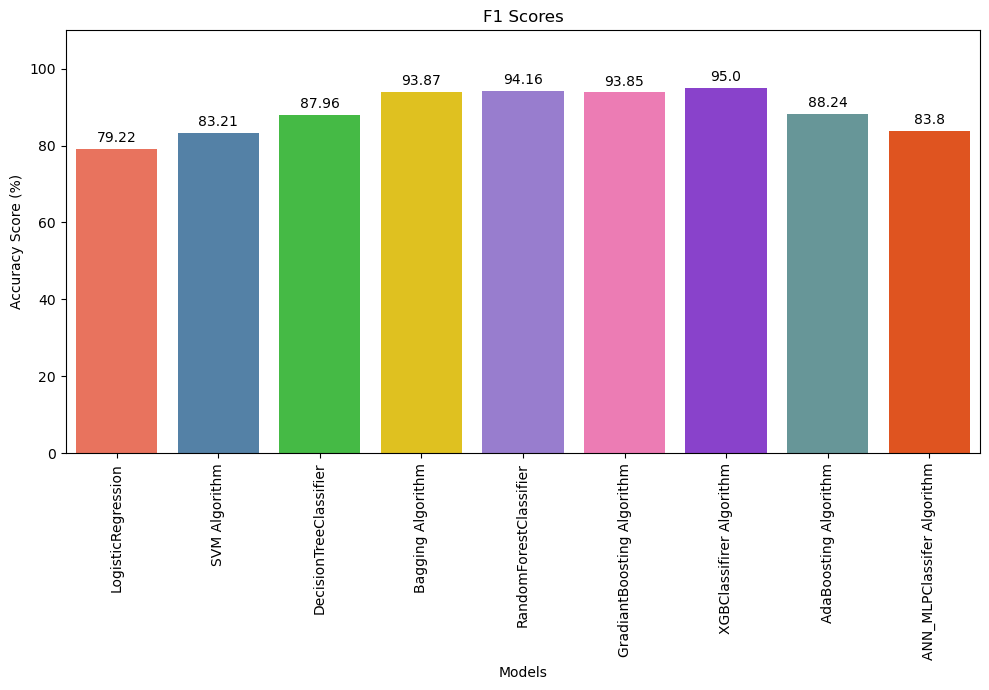

In [714]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500', '#D2691E', '#1E90FF']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 7))
bars = sns.barplot(x='Model', y='F1_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('F1 Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

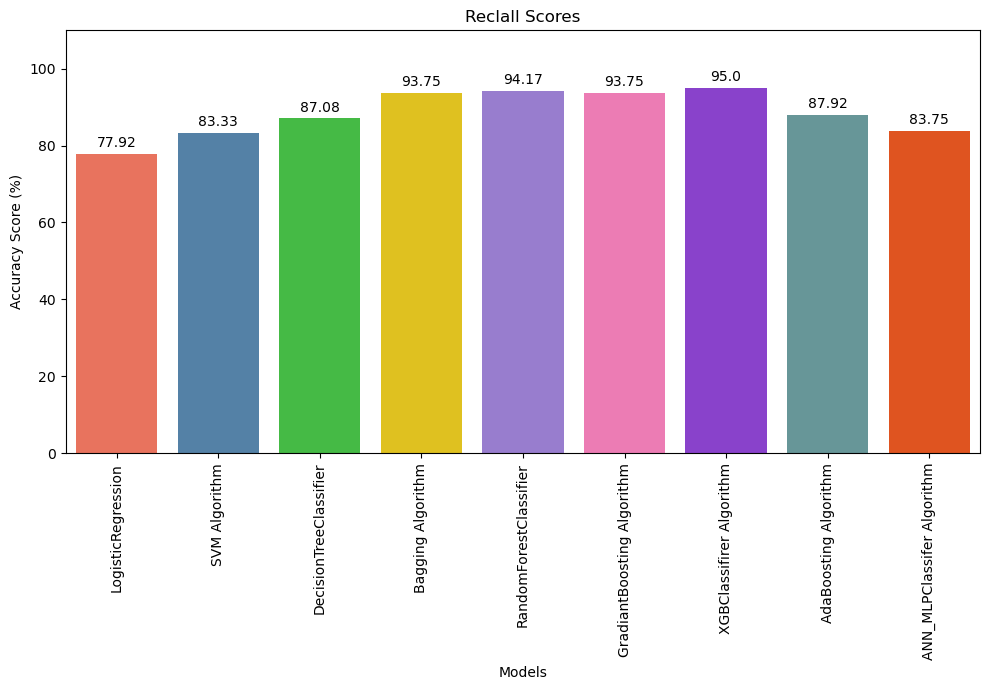

In [716]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500', '#D2691E', '#1E90FF']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 7))
bars = sns.barplot(x='Model', y='Recall_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Reclall Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

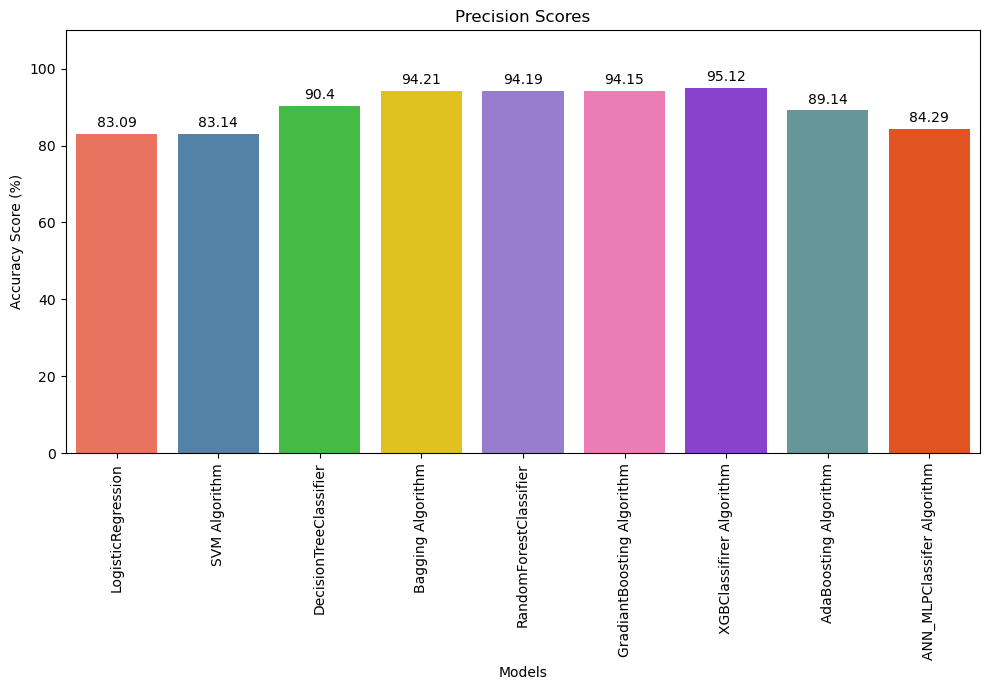

In [718]:
# Plotting the Accuracy Scores
colors = ['#FF6347', '#4682B4', '#32CD32', '#FFD700', '#9370DB', '#FF69B4', '#8A2BE2', '#5F9EA0', '#FF4500', '#D2691E', '#1E90FF']
# Plotting the Accuracy Scores
plt.figure(figsize=(10, 7))
bars = sns.barplot(x='Model', y='Precision_Score', data=score, palette=colors)

for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, round(yval, 2), ha='center', va='bottom')

# Adding titles and labels
plt.title('Precision Scores')
plt.xlabel('Models')
plt.ylabel('Accuracy Score (%)')
plt.xticks(rotation=90)
plt.ylim(0, 110)  # Set y limit for better visibility

# Show the plot
plt.tight_layout()
plt.show()

# Model Comparison Conclusion Report

- In this project, a total of **9 machine learning algorithms** were applied to predict **employee performance ratings**.

- The algorithms used are:  
  **Logistic Regression**, **SVM**, **Decision Tree**, **Bagging**, **Random Forest**, **Gradient Boosting**, **XGBoost**, **AdaBoost**, and **ANN (MLPClassifier)**.

- The **best-performing model** is **XGBoost Classifier** with:
  - **Testing Accuracy**: 95.00%
  - **Training Accuracy**: 98.89%
  - **F1 Score**: 95.00%
  - **Recall Score**: 95.00%
  - **Precision Score**: 95.12%  
  These results show that XGBoost is a **generalized model**, performing well on both training and testing data, and is suitable for future prediction tasks.

- Other high-performing models:
  - **Random Forest Classifier**: Accuracy - 94.16%
  - **Bagging Algorithm**: Accuracy - 93.75%
  - **Gradient Boosting Algorithm**: Accuracy - 93.75%
  - **Decision Tree Classifier**: Accuracy - 87.08%
  - **AdaBoost Algorithm**: Accuracy - 87.91%

- **ANN (MLPClassifier)** showed signs of **overfitting**, with **100% training accuracy** and only **82.91% test accuracy**.

- **Logistic Regression** and **SVM** had lower accuracy scores (**77.91% and 83.33%** respectively), making them less suitable for this use case.

- **Final Recommendation**:  
  Based on the evaluation metrics, **XGBoost Classifier** is the most accurate and balanced model. It is recommended for deployment due to its strong generalization and consistent performance across metrics.


# Data Analysis

The goal of this project is to analyze employee data and predict their performance ratings based on various personal, educational, and job-related factors. A total of **1200 records** and **28 features** were provided for analysis. The steps and findings from the data analysis phase are detailed below:

### 1. Understanding the Dataset

The dataset includes various feature types:
- **Demographic attributes**: Age, Gender, Marital Status, Distance from Home, Education Field
- **Job-related attributes**: Department, Job Involvement, Work-Life Balance, Training, Years at Company
- **Performance indicators**: Performance Rating (target), Attrition, OverTime, Salary Hike Percent, etc.

The **target variable** `PerformanceRating` is categorical, with values mainly ranging between **2, 3, and 4**. 

### 2. Target Variable Distribution

The performance rating was found to be **imbalanced**:
- Majority of the employees were rated as **3**
- Very few employees were rated as **2 or 4**
This imbalance could bias the model and required correction during the model training phase using **SMOTE**.

### 3. Analysis of Categorical Features

- **Gender**: Majority of employees were male. However, there was **no significant difference** in performance between genders.
- **Marital Status**: Most employees were **married**. Interestingly, married employees showed slightly lower performance ratings compared to single ones.
- **Education Field**: Employees from **Life Sciences** and **Medical** fields were the majority, but variation in performance was observed across different fields.
- **Department**: Departments such as **Sales**, **Research & Development**, and **Human Resources** had the largest employee counts. Performance varied slightly between departments but was generally concentrated around rating 3.
- **Business Travel**: Most employees **rarely traveled**. Employees who traveled **frequently** showed slightly lower performance, possibly due to job stress or lack of work-life balance.
- **OverTime**: Employees who worked **OverTime** tended to have a mix of high and low performance, requiring further investigation.

### 4. Analysis of Continuous Features

Boxplots were used to understand the spread and identify outliers:
- **Age**: Normally distributed with most employees in the **30–40** age group.
- **Distance From Home**: Left-skewed, with many employees living **less than 10 km** from work.
- **Hourly Rate**: Uniform distribution, but outliers observed above **80**.
- **Total Working Years**: Most employees had **0–20 years** of experience, though a few had **more than 30 years**.
- **Years at Company** and **Years in Current Role**: Showed right-skewed patterns with **many newcomers** and **fewer long-tenure employees**.
- **Years Since Last Promotion**: Many employees had not been promoted in the last **2–4 years**, correlating with lower performance in some cases.

### 5. Correlation Analysis

A heatmap of correlation was used to examine relationships among features:
- **Years at Company**, **Years in Current Role**, and **Years with Current Manager** were **positively correlated**.
- **Environment Satisfaction**, **Job Satisfaction**, and **Relationship Satisfaction** did not show strong correlation with the performance rating numerically, but visual plots showed they still influence performance.

### 6. Key Observations

- Employees with **poor work-life balance**, **low environment satisfaction**, or **no recent promotion** were more likely to have **lower performance ratings**.
- Those who had **more training**, better **job involvement**, and recent **salary hikes** tended to perform better.
- Some features like **Employee Number** and **Standard Hours** were not useful for prediction and were removed during preprocessing.

### Conclusion

The data analysis phase helped in:
- Identifying meaningful patterns between employee attributes and their performance.
- Understanding class imbalance in the target variable.
- Selecting and transforming relevant features for model building.
- Planning the preprocessing steps like encoding, handling outliers, and applying SMOTE.

These insights laid the foundation for effective feature engineering and model selection in the next phase of the project.


# Final Report on Challenges Faced 

### 1. Unbalanced Target Variable
* The target column (Performance Rating) was **highly imbalanced**, with most employees rated as "3".
* This made the model biased towards the majority class and **less accurate** for other ratings.
* To solve this, we used the **SMOTE technique** to balance the training data.

### 2. Categorical Variables
* The dataset had many **categorical features** (like Gender, Department, Education Field).
* These needed to be converted into **numerical format** using **Label Encoding** and **Manual Encoding** for model training.

### 3. Irrelevant or Redundant Features
* Some columns had **no relation with the target variable** or contained duplicate information.
* These were removed after analyzing **correlation and feature importance**, to reduce overfitting.

### 4. Presence of Outliers
* Several numeric columns showed **outliers** (extreme values) during boxplot visualization.
* These outliers affected the model’s learning and had to be **handled carefully**.

### 5. Missing Values
* Some columns had **missing values**, which could affect training quality.
* We used **imputation** techniques or removed such rows/columns as needed.

### 6. Model Selection and Tuning
* Choosing the right model from many (Logistic Regression, SVM, Random Forest, XGBoost, etc.) was a challenge.
* Each model gave different results, and we had to perform **hyperparameter tuning** for better performance.

### 7. Overfitting in Some Models
* Some models, like Decision Trees and ANN, showed **very high training accuracy but lower testing accuracy**, indicating overfitting.
* To resolve this, we used **regularization**, **cross-validation**, and selected more **generalized models**.



# Final Insights and Recommendations to improve the employee performance



### 1. Workforce Demographics
- Around **60% of employees are aged between 25 to 40**, which shows that the company has a young and potentially motivated workforce.
- **60% of employees travel only 0–10 km** to work. This shorter commute may lead to better job satisfaction and lower stress levels.
- Most employees have worked in **0–3 companies before**, suggesting they are still early in their careers and open to growth.

### 2. Salary and Experience
- Most employees received a **salary hike of 12%–14%**, which is standard but may not be enough for top performers.
- A large number of employees have **5–13 years of total experience**, but only **0–10 years in the current company**, which suggests moderate stability.
- Departments like **Human Resources, Development, and Data Science** showed **better performance ratings**, meaning these teams are more engaged or better supported.

### 3. Key Factors Affecting Performance
- **Work experience**, **salary**, and **job satisfaction** are strongly linked to higher performance.
- Employees with **more experience** tend to do better due to better skills and understanding.
- **Competitive pay** and **regular hikes** (above 14%) help keep employees motivated.

### 4. Areas of Concern and Recommendations

- **Underperforming Departments**: 
  - **Sales**, **Finance**, and **R&D** departments showed lower performance.
  - Recommendation: Provide better support, training, or resources for these departments.

- **Long Commute Impact**: 
  - Employees who **travel more than 15 km** show lower performance.
  - Recommendation: Offer transport benefits or allow remote work options.

- **Overtime Policy**: 
  - Some employees are working without overtime pay.
  - Recommendation: Standardize **overtime compensation** to maintain fairness and motivation.

- **Salary Hike Impact**: 
  - Employees who got **less than 20% hike** had lower performance.
  - Recommendation: Consider a **minimum 30% hike** for high-performing employees to retain talent.

- **Long Tenure Without Role Change**: 
  - Employees who have been in the **same role for over 5 years** show lower performance.
  - Recommendation: Implement **internal role transfers or promotions** to re-engage them.

- **No Promotion for 4–5 Years**: 
  - Employees without promotions for several years are underperforming.
  - Recommendation: Review and update the **promotion policy** to reward deserving employees.

- **Manager Influence**:
  - Employees working under the **same manager for more than 7 years** had lower performance.
  - Recommendation: Rotate leadership or conduct 360° feedback to refresh team dynamics.

---

### Conclusion
To improve employee performance, the company should focus on providing growth opportunities, competitive compensation, better work-life balance, and strong support systems for underperforming departments. Making these strategic changes can lead to higher employee engagement, satisfaction, and overall productivity.


<h1 style="text-align: center;"><strong>Thank You</strong></h1>
